<a href="https://colab.research.google.com/github/nakatoconstance/nakatoconstance/blob/main/Yet_another_copy_of_Neural_Network_Models_October_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import torch

# Set random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [141]:
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.metrics import mean_squared_error, r2_score# importing package for model evaluation
uploaded=files.upload()#C:\Users\USER\OneDrive\Desktop\nakato research\Objective 1 Content\Dataset building\DATASET FOR MODELING HHV\HHV_DATASET_DRY.csv

Saving HHV_DATASET_DRY_final_2.csv to HHV_DATASET_DRY_final_2 (4).csv


In [143]:
data = pd.read_csv('HHV_DATASET_DRY_final_2.csv', encoding='latin-1') # or 'ISO-8859-1', 'cp1252'
data.head()

Unnamed: 0             Biomass   ASH     VM     FC     C    H     O    N  \
0   1.              Alfalfa Stem  5.27  78.92  15.81 47.17 6.00 38.19 2.68   
1   2.          alfalfa (lucern)  9.40   73.9   16.7 45.00 6.00 36.90 2.50   
2   3.        alfalfa seed straw  7.25   72.6  20.15 46.76 5.40 40.72 1.00   
3   4.          cotton gin trash 17.60   67.3   15.1 39.59 5.26 36.38 2.09   
4   5.          cotton gin waste  9.36  82.16   8.48 49.03 4.71 35.08 1.45   

     S   Cel   Hem   Lig  HHV (MJ/kg) Source  
0 0.20   NaN   NaN   NaN        18.67    [1]  
1 2.00   NaN   NaN   NaN        18.60    [2]  
2 0.02   NaN   NaN   NaN        18.45    [2]  
3  NaN 20.00  9.10  17.6        16.42    [2]  
4 0.36 77.80 16.00     0        16.27    [2]

In [144]:
#data.head()
#count missing values
data.isnull().sum()
#compute percentage
data.isnull().sum()/len(data)*100
#display recouds with empty source column
#DISPLAY SOURCE WITH nan
#print(data['Source'].isna())

Unnamed: 0     0.75
Biomass        2.25
ASH            2.62
VM             8.61
FC             8.61
C              3.00
H              5.62
O              5.62
N              5.99
S             25.84
Cel           21.72
Hem           21.72
Lig           20.22
HHV (MJ/kg)    8.61
Source         3.00
dtype: float64

In [145]:
# Assuming 'data' is your DataFrame
cols_to_convert = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Explanation:

sns.jointplot(): This function creates the joint probability distribution plot.
kind='kde': We use kind='kde' to generate a kernel density estimation plot, which shows the distribution of the data as smooth contours. This is better for visualizing outliers compared to a scatter plot or a hexbin plot.
Outlier Visualization: The isolated contours in the plot will indicate the presence of outliers. These are points that are far away from the main concentration of the data.

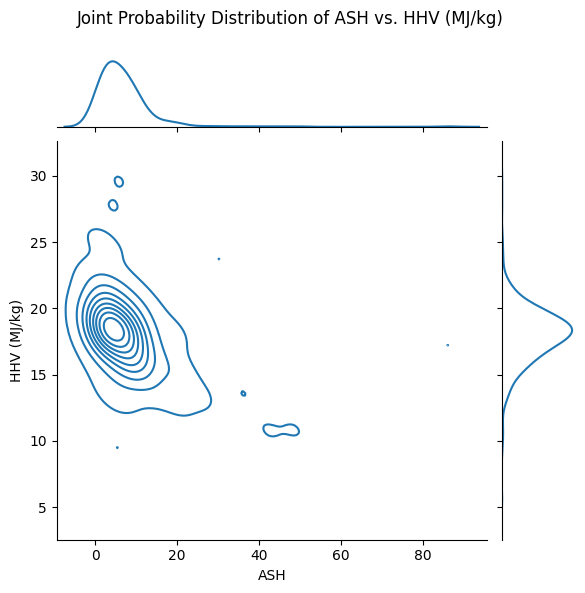

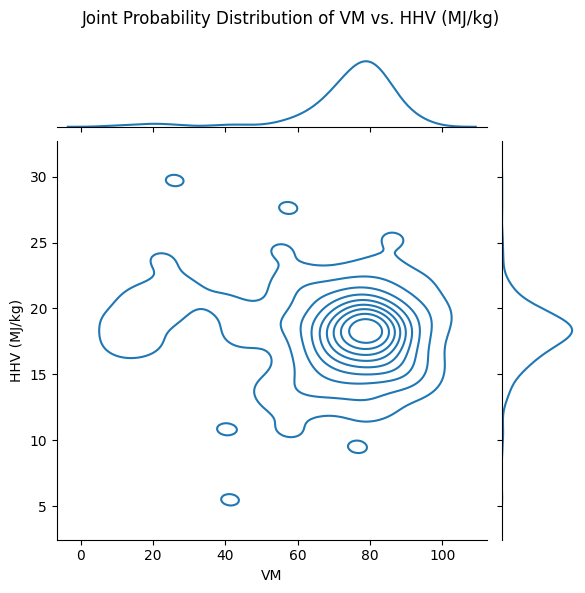

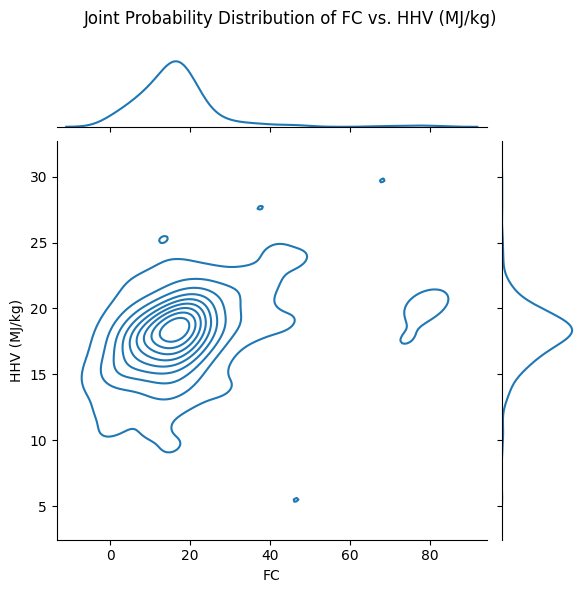

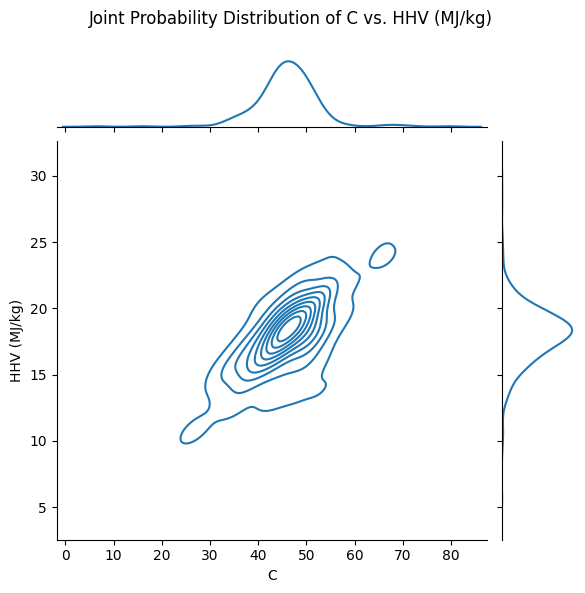

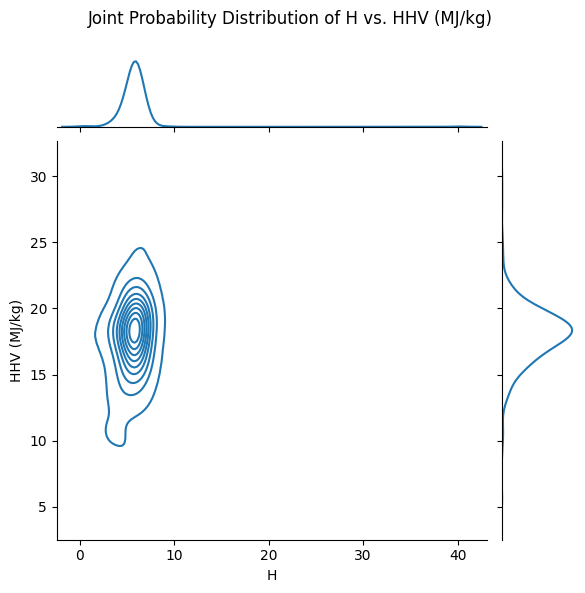

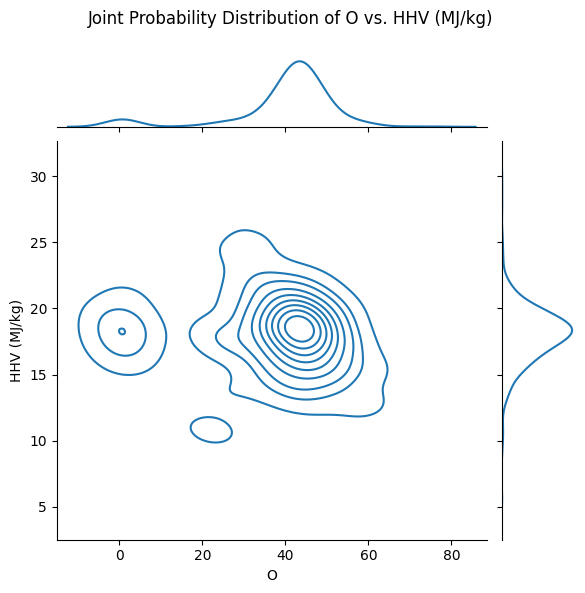

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

#columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O']

for column in columns_to_plot:
    g = sns.jointplot(x=column, y='HHV (MJ/kg)', data=data, kind='kde')
    g.fig.suptitle(f'Joint Probability Distribution of {column} vs. HHV (MJ/kg)')
    plt.subplots_adjust(top=0.9)  # Adjust the top margin to prevent title cutoff
    plt.show()

In [ ]:
#

In [147]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

columns_to_impute = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Create KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data
data_imputed = imputer.fit_transform(data[columns_to_impute])

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=columns_to_impute, index=data.index)

# Normalize to ensure ASH + VM + FC = 100
data_imputed[['ASH', 'VM', 'FC']] = data_imputed[['ASH', 'VM', 'FC']].div(data_imputed[['ASH', 'VM', 'FC']].sum(axis=1), axis=0) * 100

# Normalize to ensure S + H + C + O + N = 100
data_imputed[['S', 'H', 'C', 'O', 'N']] = data_imputed[['S', 'H', 'C', 'O', 'N']].div(data_imputed[['S', 'H', 'C', 'O', 'N']].sum(axis=1), axis=0) * 100

# Replace original columns with imputed and adjusted values
data[columns_to_impute] = data_imputed[columns_to_impute]

# Now 'data' has missing values filled using KNN imputation and sums adjusted to 100


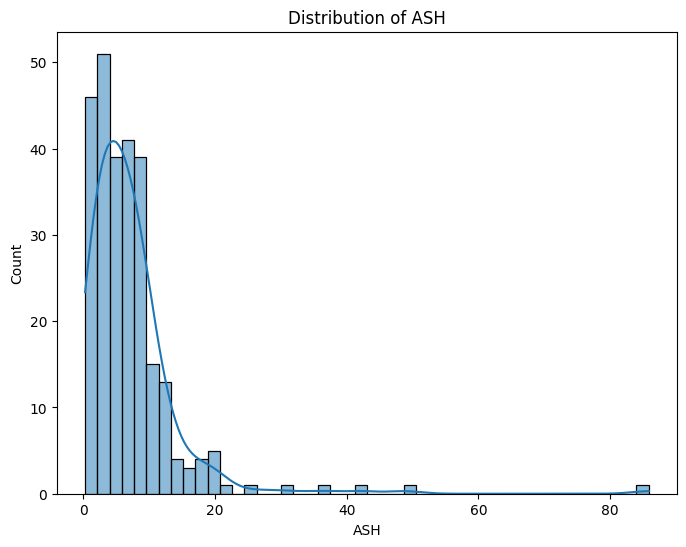

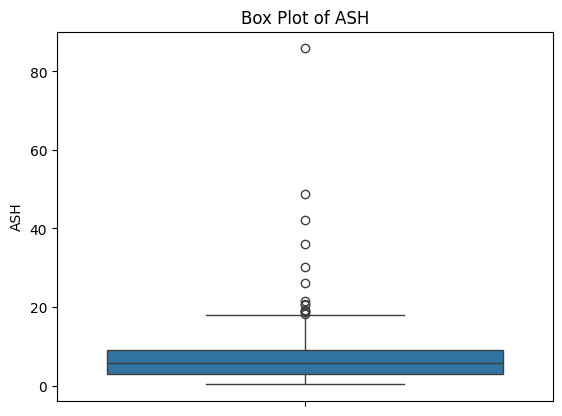

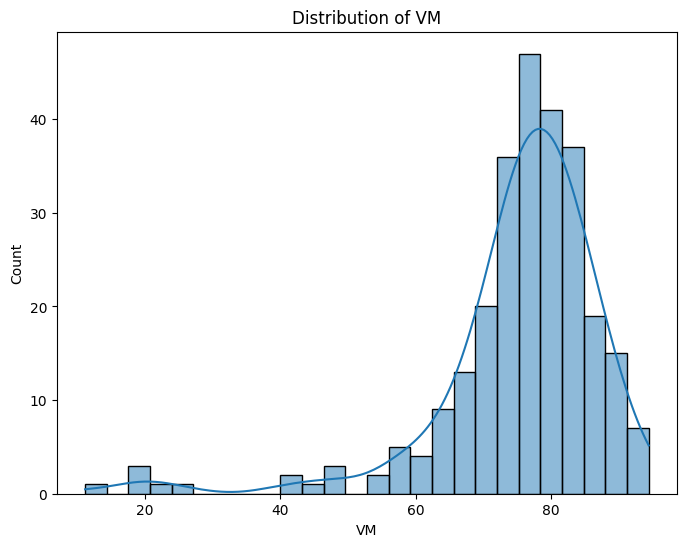

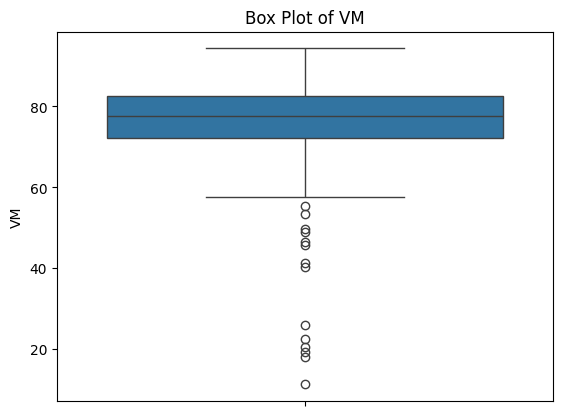

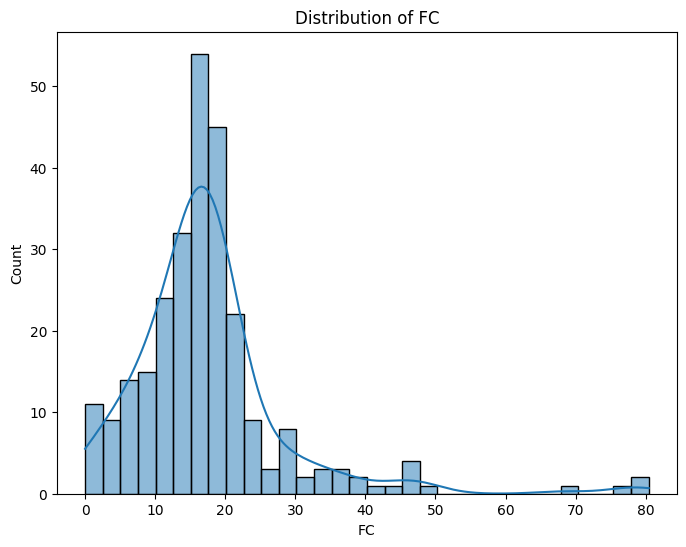

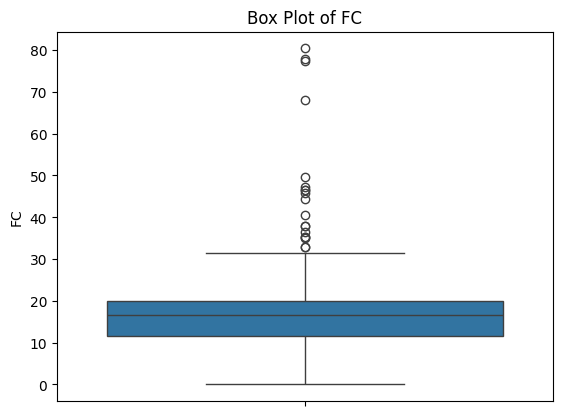

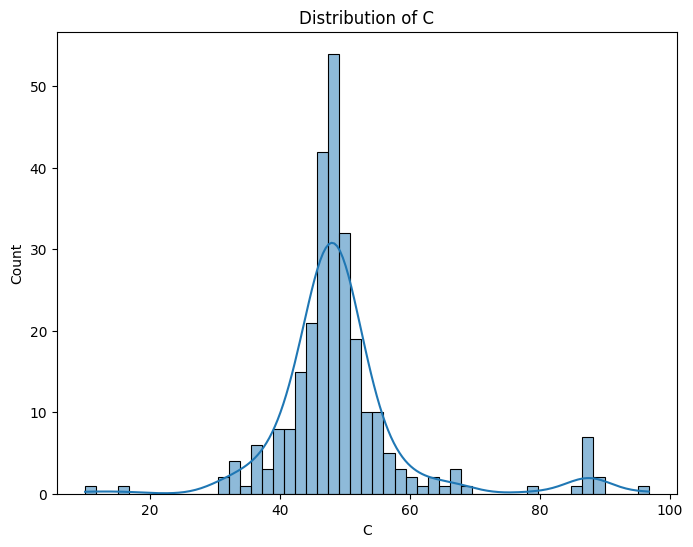

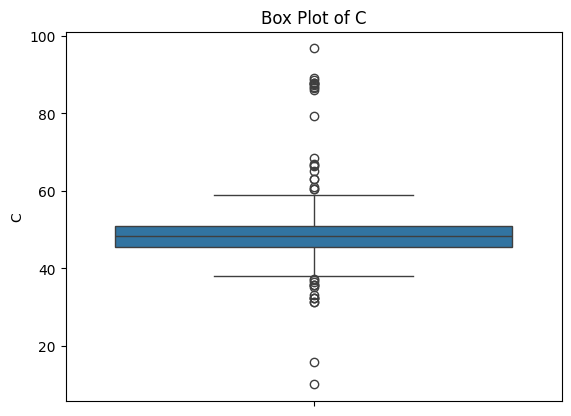

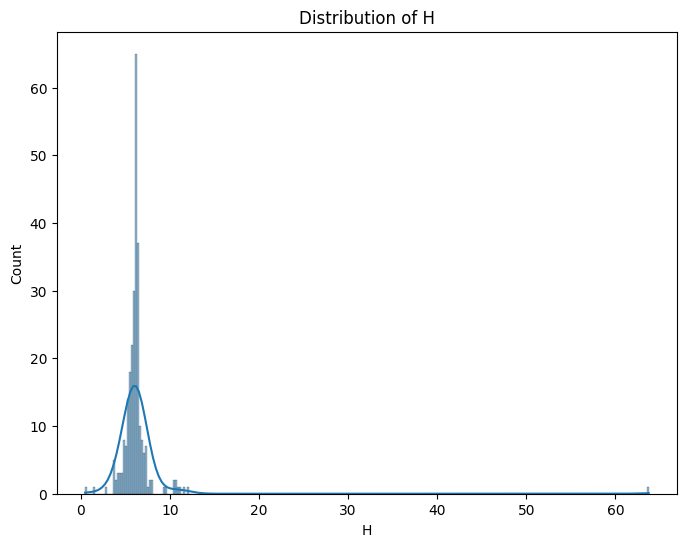

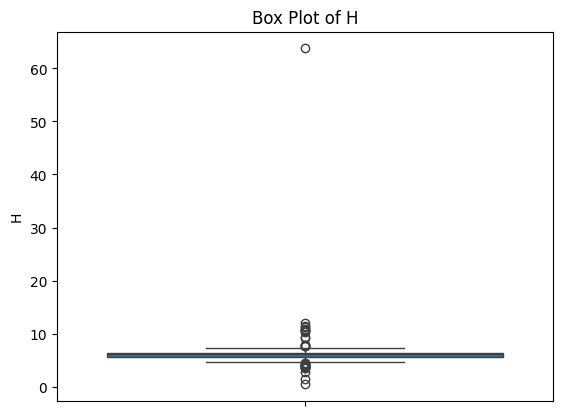

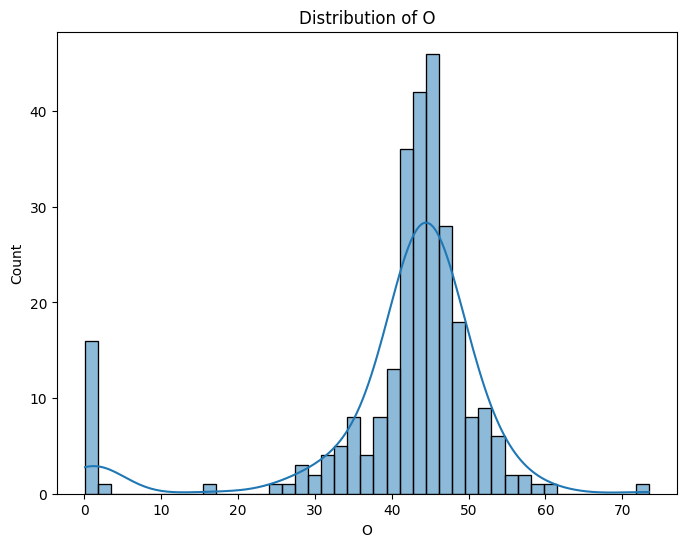

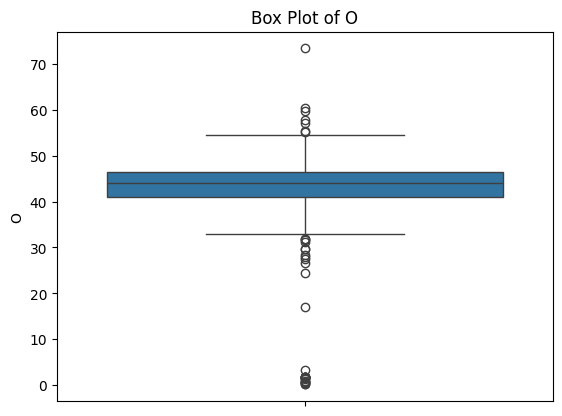

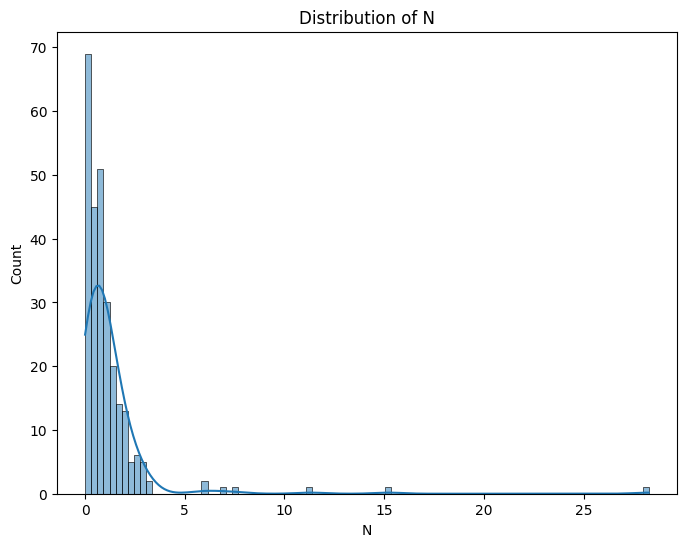

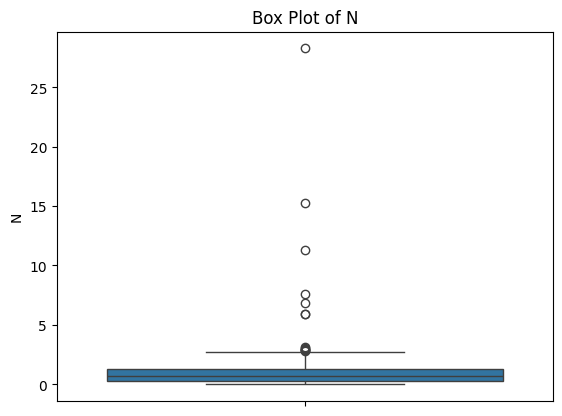

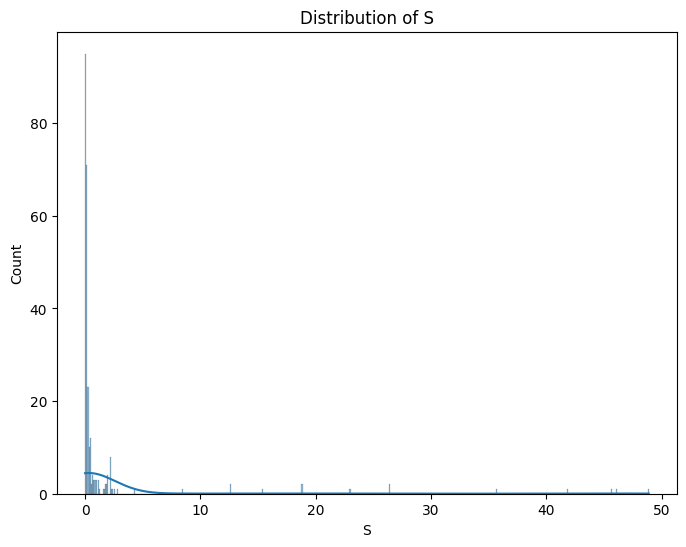

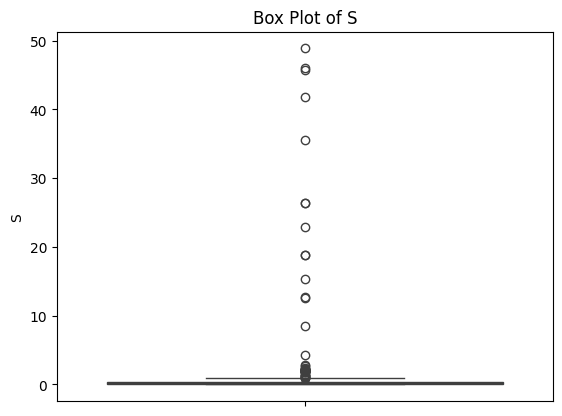

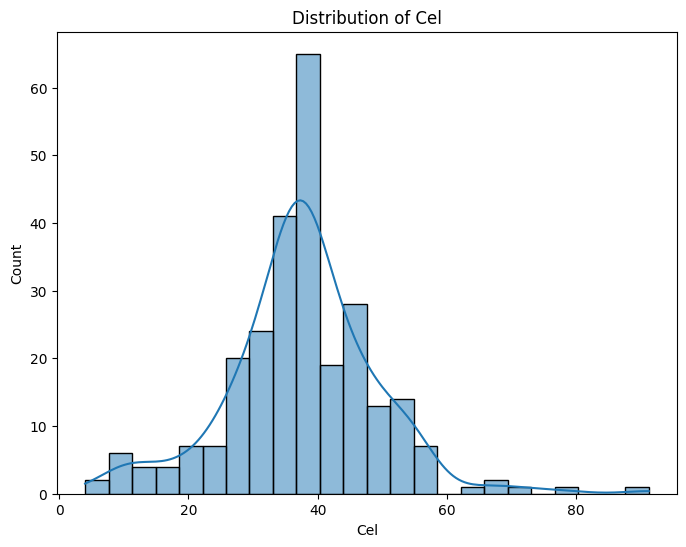

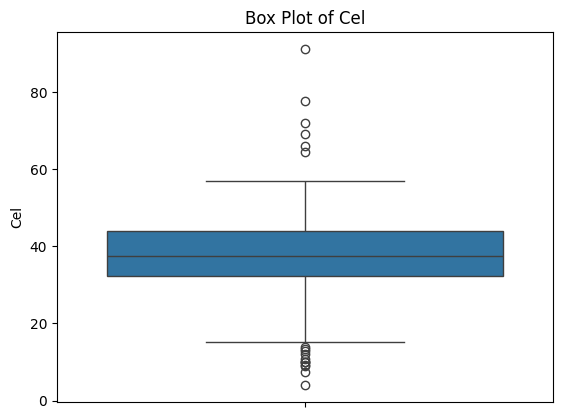

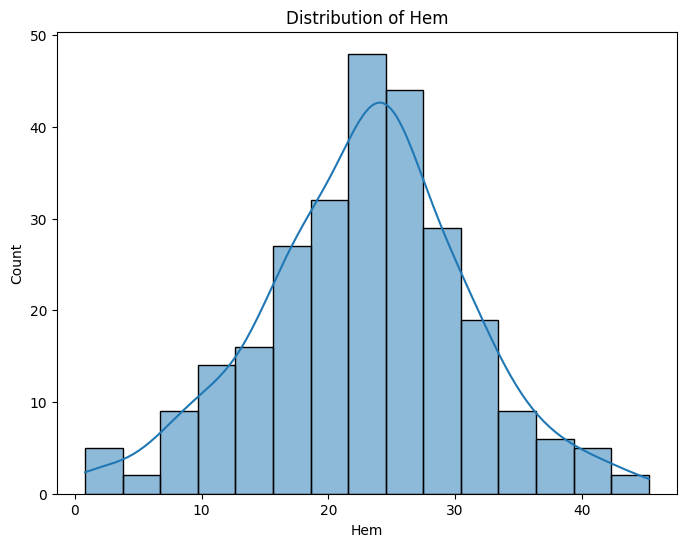

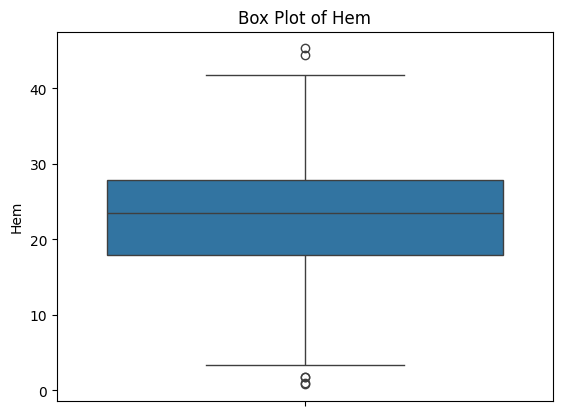

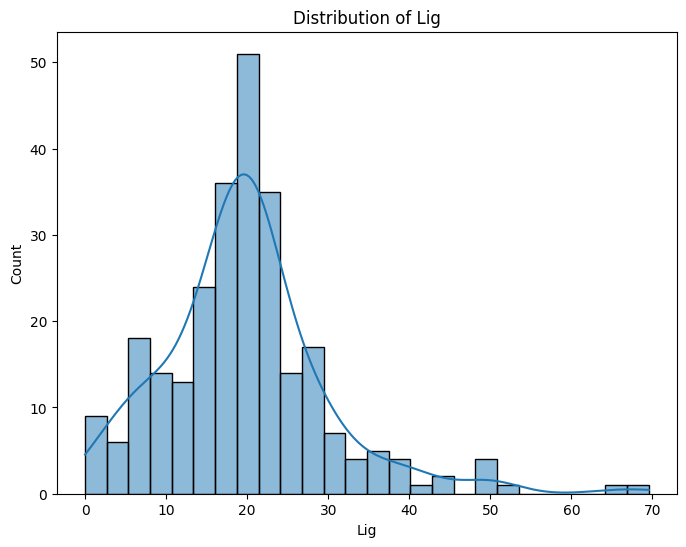

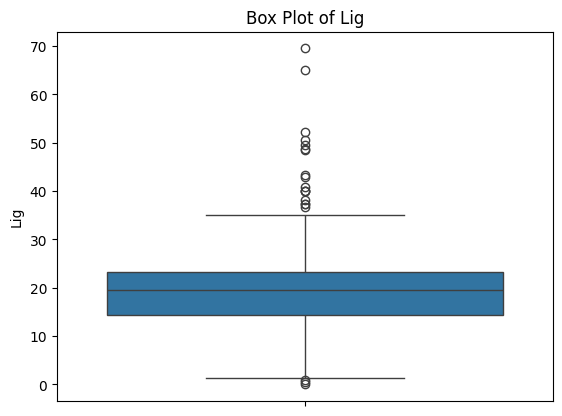

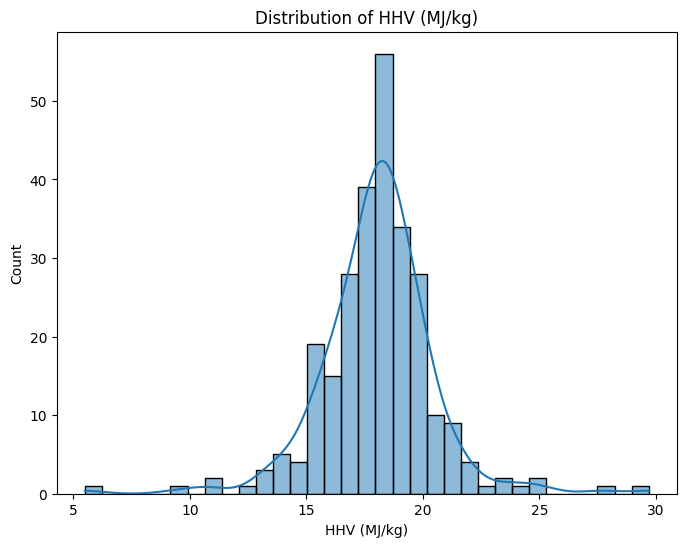

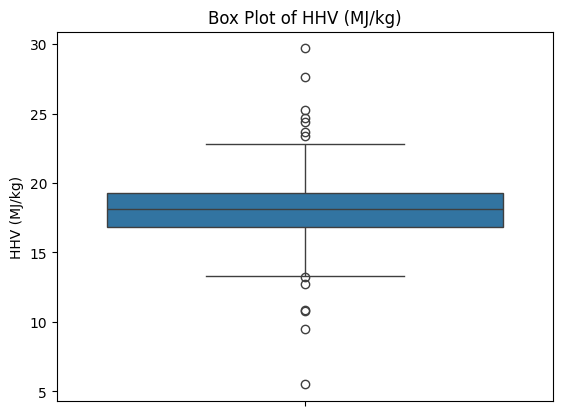

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_check:
  # Histogram
   plt.figure(figsize=(8, 6))
   sns.histplot(data[column], kde=True)
   plt.title(f'Distribution of {column}')
   plt.show()
   # Box Plot plt.figure(figsize=(8, 6))
   sns.boxplot(y=data[column])
   plt.title(f'Box Plot of {column}')
   plt.show()

In [149]:
data.isnull().sum()  # Check for missing values in each column

Unnamed: 0     2
Biomass        6
ASH            0
VM             0
FC             0
C              0
H              0
O              0
N              0
S              0
Cel            0
Hem            0
Lig            0
HHV (MJ/kg)    0
Source         8
dtype: int64

In [150]:
from scipy.stats import kurtosis
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
for column in columns_to_check:
  kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
  print(f"Kurtosis of {column}: {kurt}")
  if kurt > 3:
    print(f"{column} has heavy tails (kurtosis > 3)")

Kurtosis of ASH: 45.775559011907504
ASH has heavy tails (kurtosis > 3)
Kurtosis of VM: 11.043395164548981
VM has heavy tails (kurtosis > 3)
Kurtosis of FC: 13.299479289695146
FC has heavy tails (kurtosis > 3)
Kurtosis of C: 9.705196677131635
C has heavy tails (kurtosis > 3)
Kurtosis of H: 208.46983300240063
H has heavy tails (kurtosis > 3)
Kurtosis of O: 8.385621021045056
O has heavy tails (kurtosis > 3)
Kurtosis of N: 92.43456089099377
N has heavy tails (kurtosis > 3)
Kurtosis of S: 31.653760953771428
S has heavy tails (kurtosis > 3)
Kurtosis of Cel: 5.32199537755065
Cel has heavy tails (kurtosis > 3)
Kurtosis of Hem: 3.241629256924841
Hem has heavy tails (kurtosis > 3)
Kurtosis of Lig: 6.505382775272934
Lig has heavy tails (kurtosis > 3)
Kurtosis of HHV (MJ/kg): 8.57918740914216
HHV (MJ/kg) has heavy tails (kurtosis > 3)


In [151]:
#removing the heavy tail using Winsorization
from scipy.stats.mstats import winsorize

# Columns to apply Winsorization
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Apply Winsorization to each column
for column in columns_to_check:
    data[column] = winsorize(data[column], limits=[0.1, 0.1])  # Winsorize at 5% and 95% percentiles

In [ ]:
#Lets check kurtosis again


In [152]:
from scipy.stats import kurtosis

columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_check:
    kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
    print(f"Kurtosis of {column}: {kurt}")
    if kurt > 3:
        print(f"{column} still has heavy tails (kurtosis > 3)")
    else:
        print(f"{column} now has less or no heavy tails (kurtosis <=3)")

Kurtosis of ASH: 1.9966771708894195
ASH now has less or no heavy tails (kurtosis <=3)
Kurtosis of VM: 2.1557252456736076
VM now has less or no heavy tails (kurtosis <=3)
Kurtosis of FC: 2.440796263871829
FC now has less or no heavy tails (kurtosis <=3)
Kurtosis of C: 2.4293635431025464
C now has less or no heavy tails (kurtosis <=3)
Kurtosis of H: 2.401769929356204
H now has less or no heavy tails (kurtosis <=3)
Kurtosis of O: 2.825399224106282
O now has less or no heavy tails (kurtosis <=3)
Kurtosis of N: 2.2162498415427536
N now has less or no heavy tails (kurtosis <=3)
Kurtosis of S: 4.54721471475422
S still has heavy tails (kurtosis > 3)
Kurtosis of Cel: 2.1857264039458806
Cel now has less or no heavy tails (kurtosis <=3)
Kurtosis of Hem: 2.01778448852608
Hem now has less or no heavy tails (kurtosis <=3)
Kurtosis of Lig: 2.180440681365956
Lig now has less or no heavy tails (kurtosis <=3)
Kurtosis of HHV (MJ/kg): 1.9904549302820793
HHV (MJ/kg) now has less or no heavy tails (kurtosi

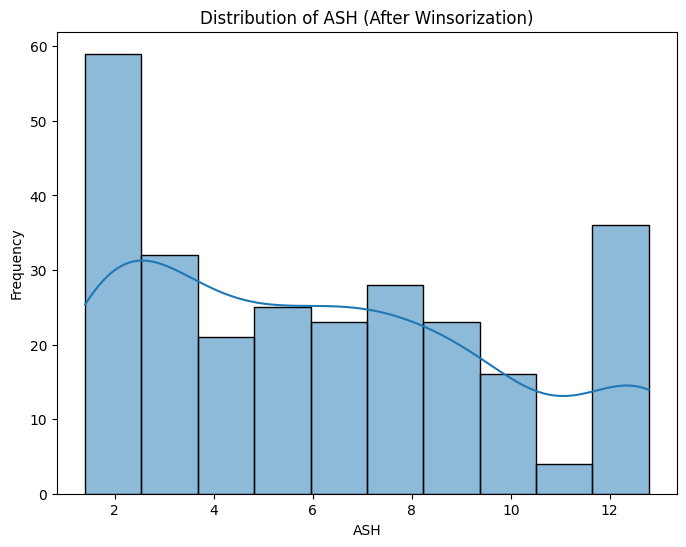

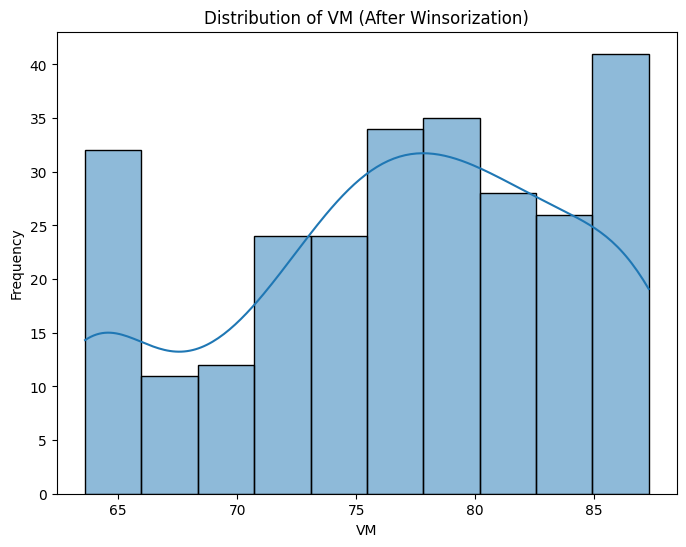

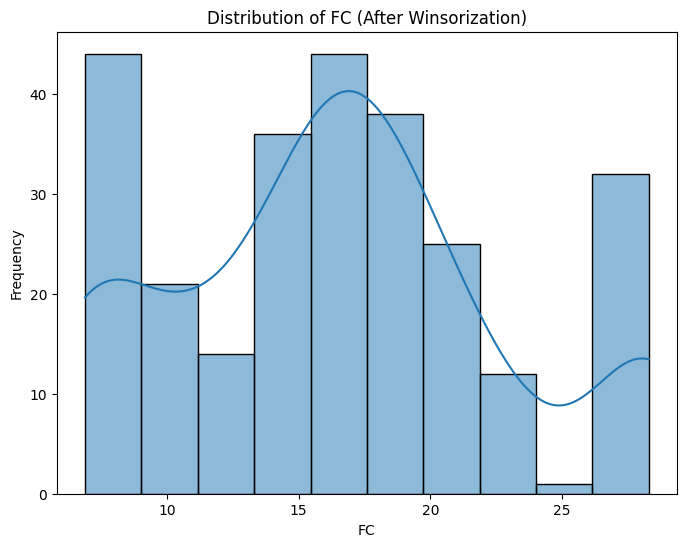

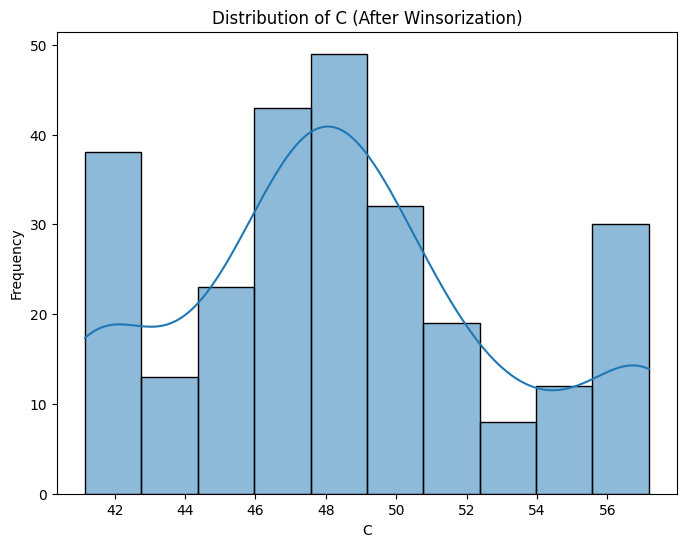

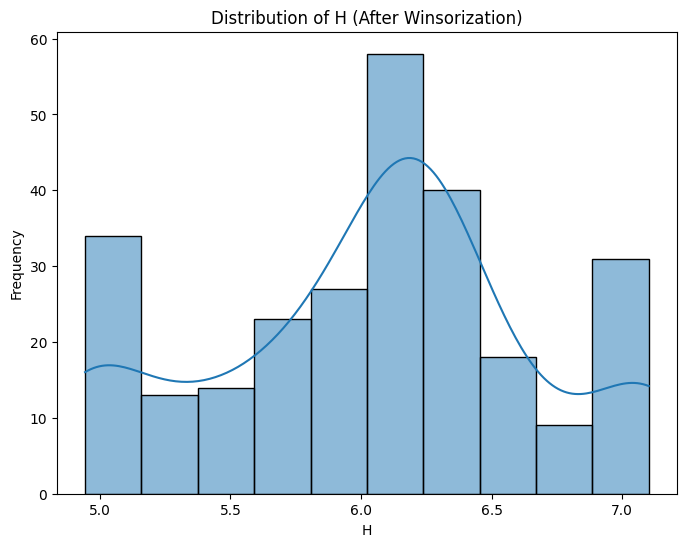

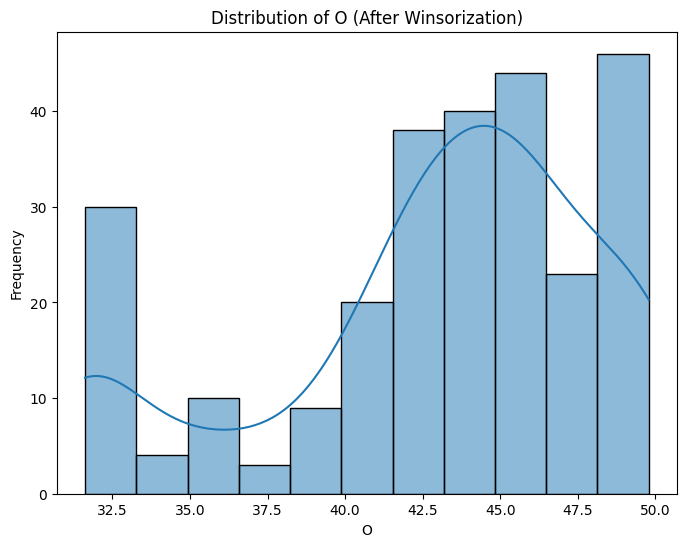

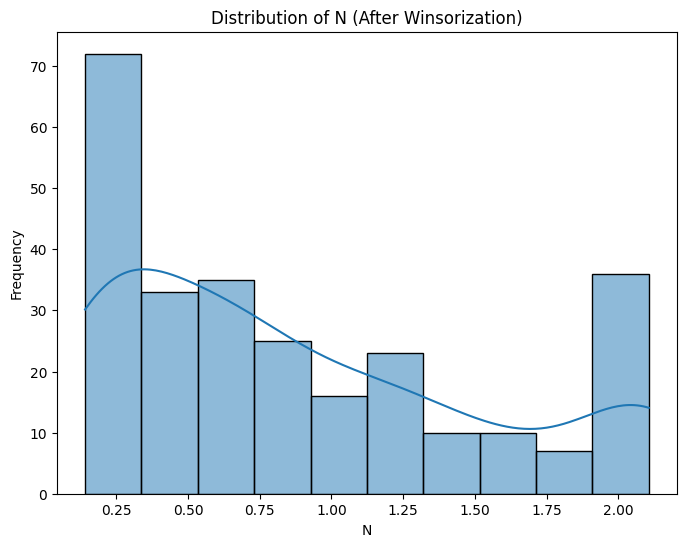

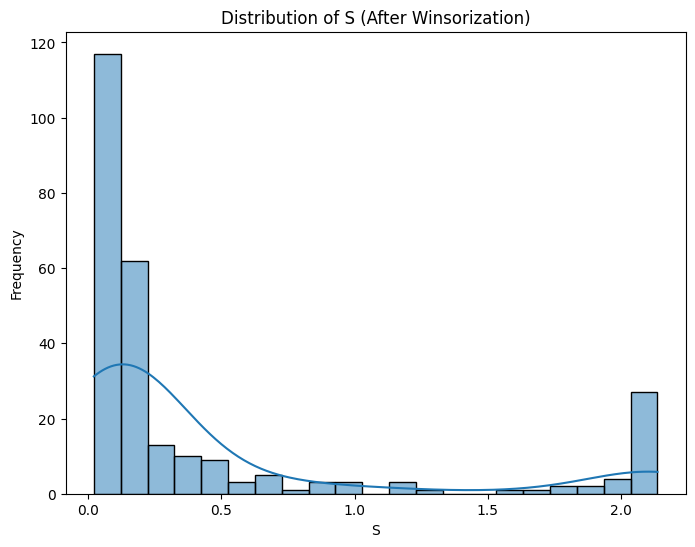

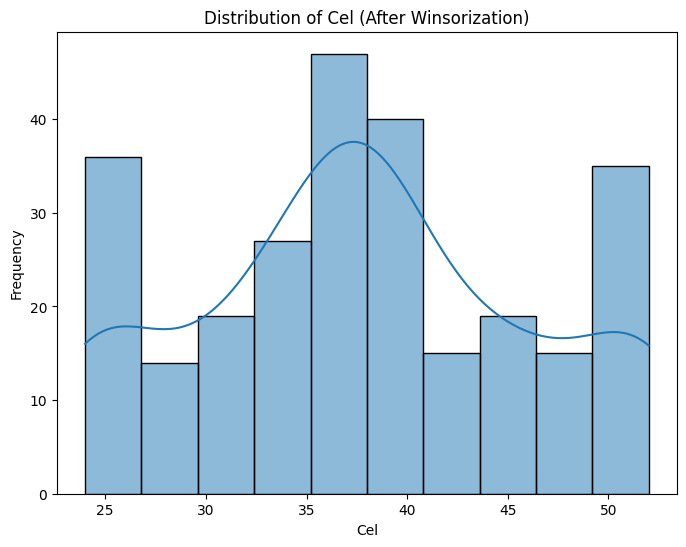

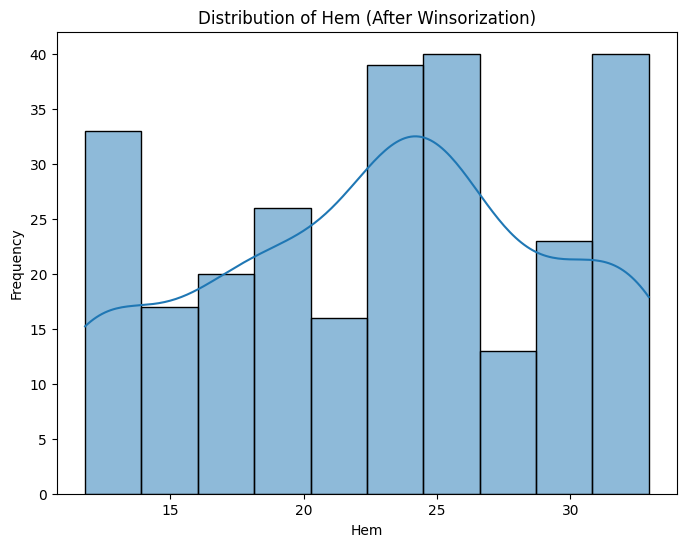

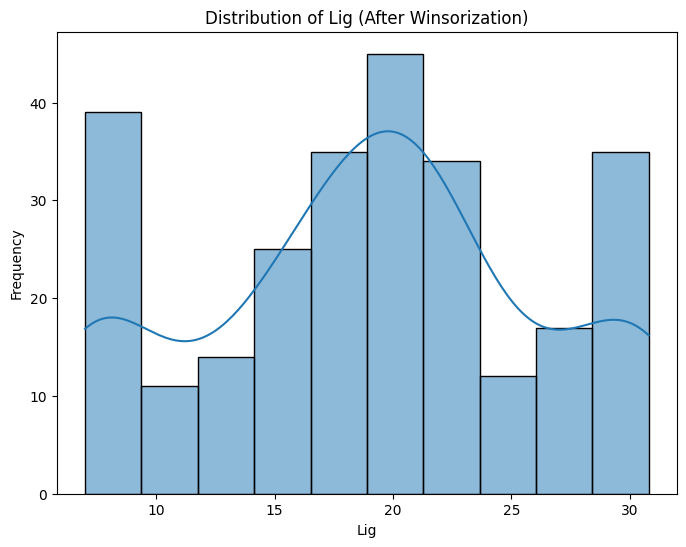

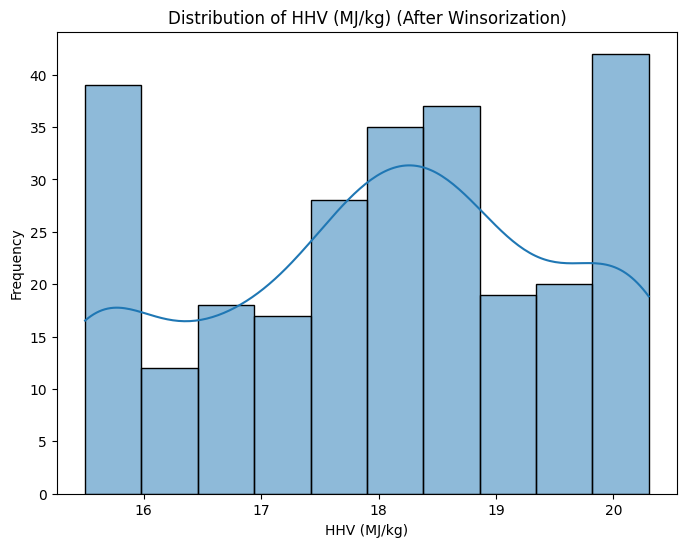

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(data[column], kde=True)  # kde=True adds a kernel density estimate curve
    plt.title(f'Distribution of {column} (After Winsorization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [154]:
#print mising values
data.isnull().sum()

Unnamed: 0     2
Biomass        6
ASH            0
VM             0
FC             0
C              0
H              0
O              0
N              0
S              0
Cel            0
Hem            0
Lig            0
HHV (MJ/kg)    0
Source         8
dtype: int64

In [155]:
#print descriptive stats to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

ASH     VM     FC      C      H      O      N      S    Cel    Hem  \
count 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00   
mean    6.17  76.78  16.42  48.45   6.04  42.91   0.88   0.46  37.78  22.88   
std     3.68   7.24   6.28   4.65   0.62   5.40   0.65   0.68   8.36   6.54   
min     1.40  63.61   6.89  41.16   4.94  31.62   0.14   0.02  24.00  11.80   
25%     2.90  72.15  11.56  45.53   5.68  40.98   0.30   0.08  32.25  17.96   
50%     5.70  77.60  16.70  48.27   6.14  44.02   0.68   0.15  37.60  23.46   
75%     8.98  82.47  19.84  51.03   6.40  46.56   1.29   0.41  44.00  27.90   
max    12.79  87.29  28.30  57.17   7.10  49.78   2.11   2.14  52.00  32.95   

         Lig  HHV (MJ/kg)  
count 267.00       267.00  
mean   19.02        18.03  
std     7.18         1.52  
min     7.00        15.50  
25%    14.34        16.84  
50%    19.50        18.11  
75%    23.25        19.25  
max    30.80        20.30

In [156]:
data.head()


Unnamed: 0             Biomass   ASH    VM    FC     C    H     O    N    S  \
0   1.              Alfalfa Stem  5.27 78.92 15.81 50.05 6.37 40.52 2.11 0.21   
1   2.          alfalfa (lucern)  9.40 73.90 16.70 48.70 6.49 39.94 2.11 2.14   
2   3.        alfalfa seed straw  7.25 72.60 20.15 49.80 5.75 43.37 1.06 0.02   
3   4.          cotton gin trash 12.79 67.30 15.10 47.20 6.27 43.37 2.11 0.67   
4   5.          cotton gin waste  9.36 82.16  8.48 54.10 5.20 38.71 1.60 0.40   

    Cel   Hem   Lig  HHV (MJ/kg) Source  
0 35.80 18.48 23.36        18.67    [1]  
1 36.48 24.26 15.34        18.60    [2]  
2 41.65 19.39 29.16        18.45    [2]  
3 24.00 11.80 17.60        16.42    [2]  
4 52.00 16.00  7.00        16.27    [2]

In [170]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
from google.colab import drive

# Set random seed for reproducibility
seed = 42
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

# Mount Google Drive (if needed for saving/loading models)
drive.mount('/content/drive')

# Set device for GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load your dataframe (assuming it's already loaded as `data`)

# Extract numeric columns for GAN
numeric_features = [
    'ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S',
    'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'
]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

# Convert to PyTorch tensor and move to device
real_data = torch.tensor(data_scaled, dtype=torch.float32).to(device)

# Parameters
latent_dim = 64  # Latent dimension for noise
data_dim = real_data.shape[1]  # Number of features
batch_size = 10
epochs = 1000

# Define Generator
class Generator(nn.Module):
    def __init__(self, latent_dim, data_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, data_dim),
            nn.Tanh()  # Tanh activation for [-1, 1] outputs
        )

    def forward(self, z):
        return self.model(z)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, data_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(data_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),  # Single output for regression
        )

    def forward(self, x):
        return self.model(x)

# Initialize models
generator = Generator(latent_dim, data_dim).to(device)
discriminator = Discriminator(data_dim).to(device)

# Optimizers and loss function
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Loss function: Mean Squared Error (MSE)
loss_function = nn.MSELoss()

# Training Loop
for epoch in range(epochs):
    for i in range(0, real_data.shape[0], batch_size):
        # Get real data batch
        real_batch = real_data[i:i + batch_size]
        current_batch_size = real_batch.shape[0]

        # Generate fake data
        noise = torch.randn(current_batch_size, latent_dim).to(device)
        fake_data = generator(noise)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(current_batch_size, 1).to(device)  # Real data label = 1
        fake_labels = torch.zeros(current_batch_size, 1).to(device)  # Fake data label = 0

        # Discriminator losses for real and fake data
        real_loss = loss_function(discriminator(real_batch), real_labels)
        fake_loss = loss_function(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        # Generator tries to produce data that looks "real" (label = 1)
        fake_labels = torch.ones(current_batch_size, 1).to(device)
        g_loss = loss_function(discriminator(fake_data), fake_labels)
        g_loss.backward()
        optimizer_G.step()

    # Log losses every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Generate 1000 synthetic data points
noise = torch.randn(1000, latent_dim).to(device)
synthetic_data = generator(noise).detach().cpu().numpy()

# Inverse transform to original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=numeric_features)

# Optionally, save model to Google Drive
torch.save(generator.state_dict(), '/content/drive/MyDrive/generator_regression.pth')
torch.save(discriminator.state_dict(), '/content/drive/MyDrive/discriminator_regression.pth')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cpu
Epoch 0, D Loss: 0.3781700134277344, G Loss: 0.311316579580307
Epoch 100, D Loss: 0.3418135643005371, G Loss: 0.35266566276550293
Epoch 200, D Loss: 0.3391282856464386, G Loss: 0.4498429596424103
Epoch 300, D Loss: 0.2848554849624634, G Loss: 0.47354769706726074
Epoch 400, D Loss: 0.28026220202445984, G Loss: 0.4055039584636688
Epoch 500, D Loss: 0.2218312919139862, G Loss: 0.5703252553939819
Epoch 600, D Loss: 0.20748549699783325, G Loss: 0.6170073747634888
Epoch 700, D Loss: 0.197958841919899, G Loss: 0.5695585608482361
Epoch 800, D Loss: 0.12809909880161285, G Loss: 0.7174028158187866
Epoch 900, D Loss: 0.16159498691558838, G Loss: 0.737488329410553


In [171]:
#If the p-value is high (usually p > 0.05), the two distributions are similar, indicating that the synthetic data replicates the real data distribution.
from scipy.stats import ks_2samp
import pandas as pd  # Import pandas for DataFrame creation

# Create an empty list to store results
ks_results = []

# Apply KS test for each feature
for feature in numeric_features:
    real_data_feature = data[feature]
    synthetic_data_feature = synthetic_df[feature]
    stat, p_value = ks_2samp(real_data_feature, synthetic_data_feature)

    # Append results to the list
    ks_results.append([feature, stat, p_value])

# Create a pandas DataFrame from the results list
ks_df = pd.DataFrame(ks_results, columns=['Feature', 'KS Statistic', 'p-value'])

# Print the DataFrame
print(ks_df)

        Feature  KS Statistic  p-value
0           ASH          0.12     0.00
1            VM          0.11     0.01
2            FC          0.11     0.01
3             C          0.11     0.01
4             H          0.13     0.00
5             O          0.12     0.00
6             N          0.14     0.00
7             S          0.20     0.00
8           Cel          0.10     0.02
9           Hem          0.10     0.02
10          Lig          0.11     0.01
11  HHV (MJ/kg)          0.10     0.02


In [174]:
from scipy.stats import wasserstein_distance

# Apply Wasserstein distance for each feature
for feature in numeric_features:
    real_data_feature = data[feature]
    synthetic_data_feature = synthetic_df[feature]
    distance = wasserstein_distance(real_data_feature, synthetic_data_feature)
    print(f"{feature}: Wasserstein Distance = {distance}")


ASH: Wasserstein Distance = 0.4851158756862386
VM: Wasserstein Distance = 1.0229066773689306
FC: Wasserstein Distance = 1.0025203116142374
C: Wasserstein Distance = 1.0756952257942163
H: Wasserstein Distance = 0.18195072111524715
O: Wasserstein Distance = 1.3904832374341853
N: Wasserstein Distance = 0.16811189609700566
S: Wasserstein Distance = 0.3016177286250716
Cel: Wasserstein Distance = 1.5719576728073212
Hem: Wasserstein Distance = 1.0834443342147027
Lig: Wasserstein Distance = 1.2631851904117168
HHV (MJ/kg): Wasserstein Distance = 0.16478518327665082


In [175]:
# Extract min and max values from the real data
real_data_min = data[numeric_features].min().values
real_data_max = data[numeric_features].max().values

# Apply clipping to the synthetic data
synthetic_data_clipped = np.clip(synthetic_data, real_data_min, real_data_max)

# Convert to DataFrame
synthetic_df= pd.DataFrame(synthetic_data_clipped, columns=numeric_features)

# Check statistics of the clipped synthetic data
print("Clipped Synthetic Data Statistics:")
print(synthetic_df.describe())


Clipped Synthetic Data Statistics:
          ASH      VM      FC       C       H       O       N       S     Cel  \
count 1000.00 1000.00 1000.00 1000.00 1000.00 1000.00 1000.00 1000.00 1000.00   
mean     6.21   76.47   16.86   48.21    6.04   44.05    0.73    0.17   37.31   
std      3.30    6.16    5.30    3.35    0.42    3.76    0.53    0.15    7.16   
min      1.40   63.61    6.89   41.16    4.94   31.62    0.14    0.02   24.00   
25%      3.55   71.81   13.36   46.07    5.77   42.41    0.33    0.08   32.50   
50%      5.39   77.50   16.67   47.91    6.01   44.43    0.59    0.13   36.67   
75%      8.48   81.45   19.25   50.19    6.33   46.56    0.98    0.19   40.68   
max     12.79   86.97   28.30   56.83    7.05   49.78    2.11    1.14   52.00   

          Hem     Lig  HHV (MJ/kg)  
count 1000.00 1000.00      1000.00  
mean    23.39   20.06        18.15  
std      5.60    6.27         1.46  
min     11.80    7.00        15.50  
25%     18.83   15.56        17.17  
50%     23.89

In [176]:
# Use describe on the real data and synthetic data to inspect their statistics
real_data_stats = data.describe()  # Statistics for the original real data
synthetic_data_stats = synthetic_df.describe()  # Statistics for synthetic data

# Show the summary statistics
print("Real Data Statistics:")
print(real_data_stats)

print("\nSynthetic Data Statistics:")
print(synthetic_data_stats)


Real Data Statistics:
         ASH     VM     FC      C      H      O      N      S    Cel    Hem  \
count 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00   
mean    6.17  76.78  16.42  48.45   6.04  42.91   0.88   0.46  37.78  22.88   
std     3.68   7.24   6.28   4.65   0.62   5.40   0.65   0.68   8.36   6.54   
min     1.40  63.61   6.89  41.16   4.94  31.62   0.14   0.02  24.00  11.80   
25%     2.90  72.15  11.56  45.53   5.68  40.98   0.30   0.08  32.25  17.96   
50%     5.70  77.60  16.70  48.27   6.14  44.02   0.68   0.15  37.60  23.46   
75%     8.98  82.47  19.84  51.03   6.40  46.56   1.29   0.41  44.00  27.90   
max    12.79  87.29  28.30  57.17   7.10  49.78   2.11   2.14  52.00  32.95   

         Lig  HHV (MJ/kg)  
count 267.00       267.00  
mean   19.02        18.03  
std     7.18         1.52  
min     7.00        15.50  
25%    14.34        16.84  
50%    19.50        18.11  
75%    23.25        19.25  
max    30.80        20.30  

Synthetic Dat

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [177]:
#handling categorical values
import numpy as np

# Sample categorical features
synthetic_df['Biomass'] = np.random.choice(
    data['Biomass'].unique(), size=1000, replace=True
)
synthetic_df['Source'] = np.random.choice(
    data['Source'].unique(), size=1000, replace=True
)


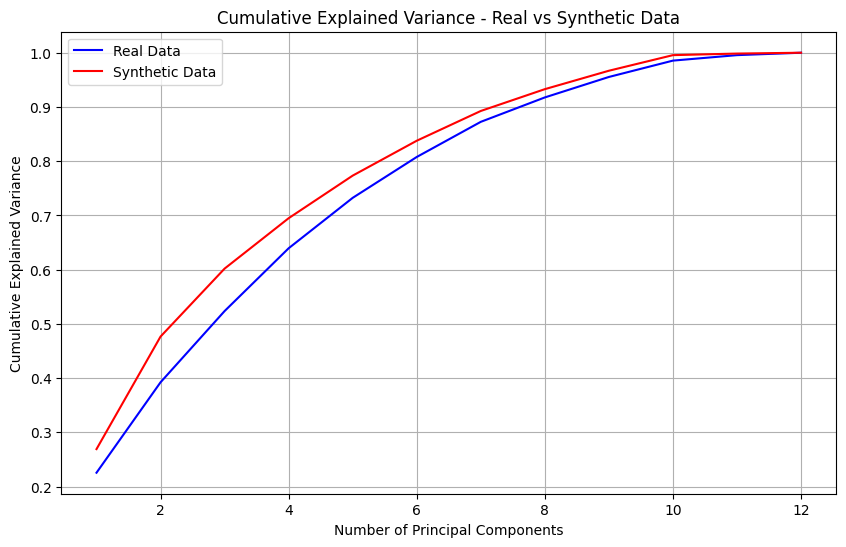

In [181]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data (important for PCA)
scaler = StandardScaler()
numeric_features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
# Scaling the real and synthetic datasets
real_data_scaled = scaler.fit_transform(data[numeric_features])
synthetic_data_scaled = scaler.fit_transform(synthetic_df[numeric_features])

# Perform PCA (using all components to examine cumulative variance)
pca_real = PCA().fit(real_data_scaled)
pca_synthetic = PCA().fit(synthetic_data_scaled)

# Explained variance ratio (individual variance explained by each component)
explained_variance_real = pca_real.explained_variance_ratio_
explained_variance_synthetic = pca_synthetic.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance_real = explained_variance_real.cumsum()
cumulative_variance_synthetic = explained_variance_synthetic.cumsum()

# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_real) + 1), cumulative_variance_real, label='Real Data', color='blue')
plt.plot(range(1, len(cumulative_variance_synthetic) + 1), cumulative_variance_synthetic, label='Synthetic Data', color='red')

# Customize the plot
plt.title('Cumulative Explained Variance - Real vs Synthetic Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


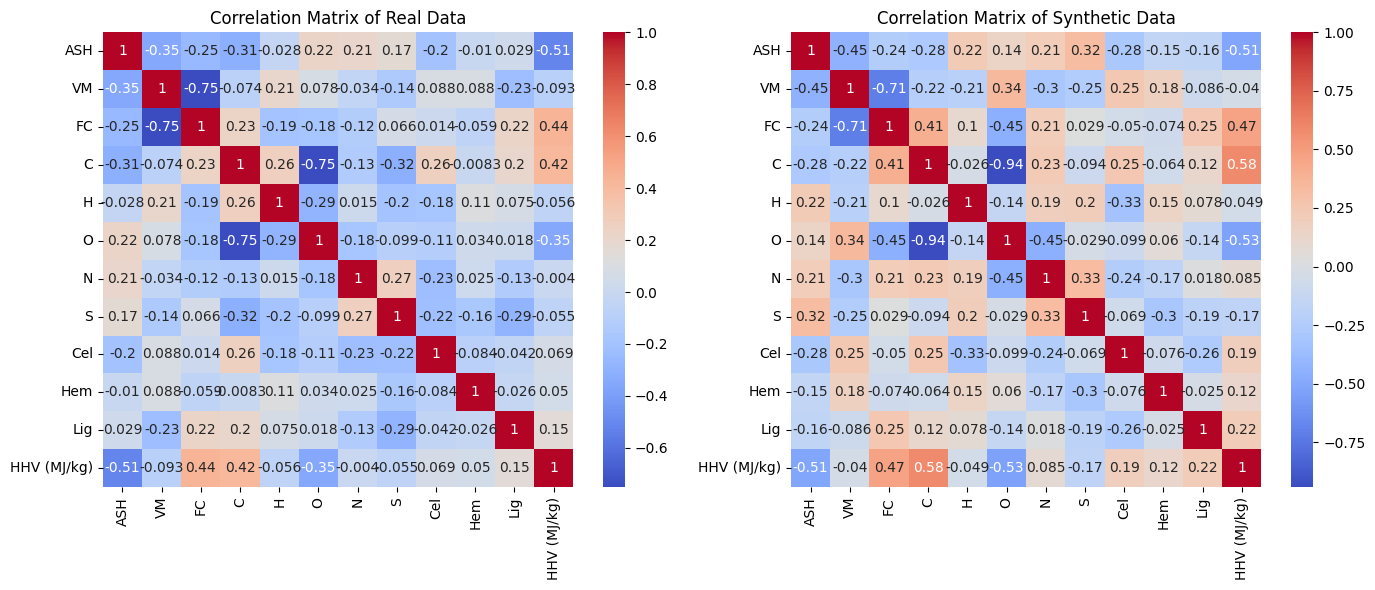

In [182]:
import seaborn as sns

# Calculate correlation matrices
real_corr = pd.DataFrame(real_data_scaled, columns=numeric_features).corr()
synthetic_corr = pd.DataFrame(synthetic_data_scaled, columns=numeric_features).corr()

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(real_corr, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix of Real Data')

sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix of Synthetic Data')

plt.tight_layout()
plt.show()


In [183]:
!pip install minisom


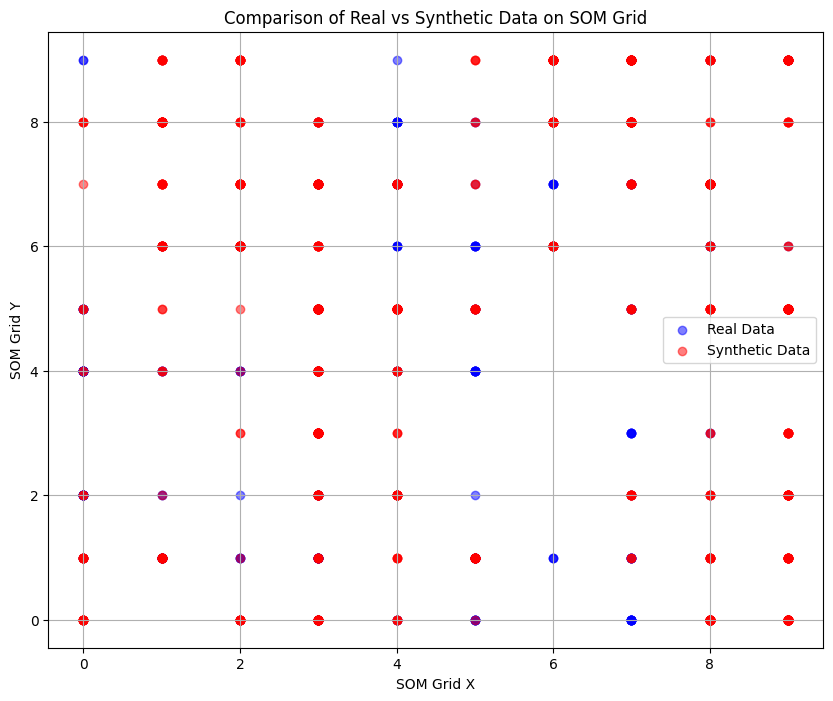

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

# Assume real_data and synthetic_data are already loaded and numeric

# Step 1: Scale the datasets
scaler = StandardScaler()
real_data_scaled = scaler.fit_transform(real_data)
synthetic_data_scaled = scaler.fit_transform(synthetic_data)

# Step 2: Train SOM for Real Data
som_real = MiniSom(10, 10, real_data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som_real.train_random(real_data_scaled, 100)

# Step 3: Train SOM for Synthetic Data
som_synthetic = MiniSom(10, 10, synthetic_data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som_synthetic.train_random(synthetic_data_scaled, 100)

# Step 4: Map Real Data Points to SOM grid (for both datasets)
real_winners = np.array([som_real.winner(data) for data in real_data_scaled])  # Winning neurons for real data
synthetic_winners = np.array([som_synthetic.winner(data) for data in synthetic_data_scaled])  # Winning neurons for synthetic data

# Step 5: Visualization (Compare the two datasets)
plt.figure(figsize=(10, 8))

# Plot real data as blue dots
plt.scatter(real_winners[:, 0], real_winners[:, 1], color='blue', label='Real Data', alpha=0.5)

# Plot synthetic data as red dots
plt.scatter(synthetic_winners[:, 0], synthetic_winners[:, 1], color='red', label='Synthetic Data', alpha=0.5)

# Add titles and labels
plt.title('Comparison of Real vs Synthetic Data on SOM Grid')
plt.xlabel('SOM Grid X')
plt.ylabel('SOM Grid Y')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


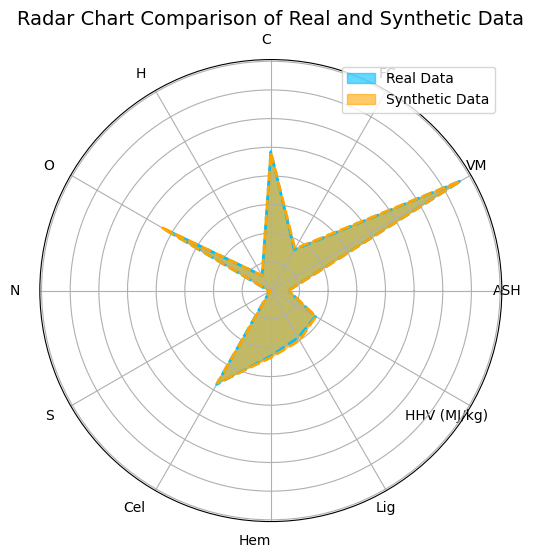

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean values for each feature
real_mean = data[numeric_features].mean()
synthetic_mean = synthetic_df[numeric_features].mean()

# Create radar chart
categories = numeric_features
N = len(categories)

real_values = real_mean.values
synthetic_values = synthetic_mean.values

# Define the angle for each feature
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Repeat the first value to close the radar chart
real_values = np.concatenate((real_values, [real_values[0]]))
synthetic_values = np.concatenate((synthetic_values, [synthetic_values[0]]))
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Fill the areas with colors
ax.fill(angles, real_values, color='deepskyblue', alpha=0.6, label='Real Data')
ax.fill(angles, synthetic_values, color='orange', alpha=0.6, label='Synthetic Data')

# Add a dashed outline for distinction
ax.plot(angles, real_values, color='deepskyblue', linewidth=2, linestyle='dashed')
ax.plot(angles, synthetic_values, color='orange', linewidth=2, linestyle='dashed')

# Hide the radial ticks
ax.set_yticklabels([])

# Set the angles and labels for each category
ax.set_xticks(angles[:-1])  # Removing the last duplicate angle
ax.set_xticklabels(categories, rotation=45, horizontalalignment='right')

# Add the title and legend
plt.title('Radar Chart Comparison of Real and Synthetic Data', fontsize=14)
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [187]:
synthetic_df.to_csv('synthetic_data.csv', index=False)

In [188]:
from google.colab import files
files.download('synthetic_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

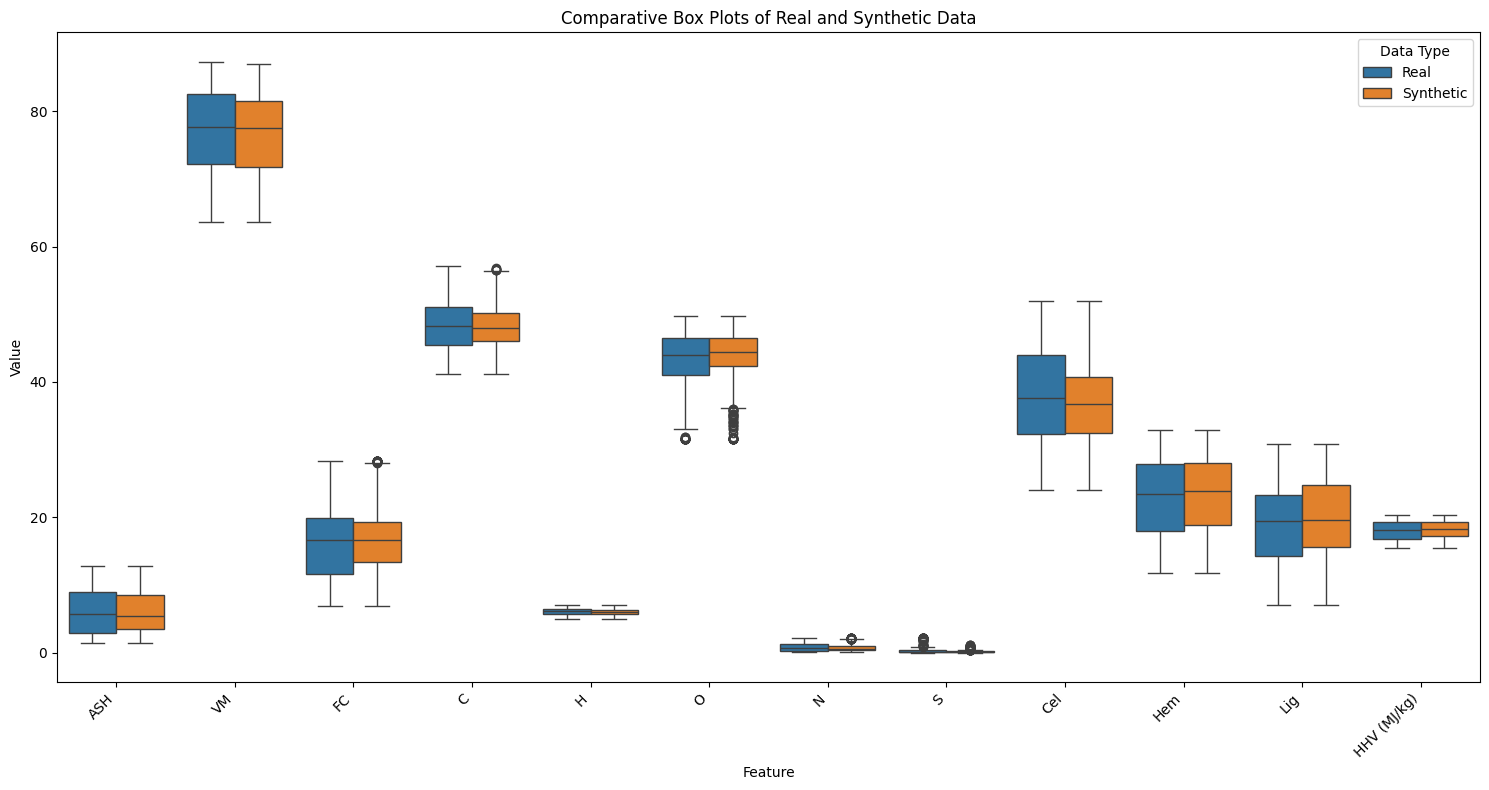

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the dataframes to long format for easier plotting
real_data_melt = pd.melt(data, value_vars=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'], var_name='Feature', value_name='Value')
synthetic_data_melt = pd.melt(synthetic_df, value_vars=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'], var_name='Feature', value_name='Value')

# Concatenate the melted dataframes and add a 'Data Type' column
real_data_melt['Data Type'] = 'Real'
synthetic_data_melt['Data Type'] = 'Synthetic'
all_data_melt = pd.concat([real_data_melt, synthetic_data_melt])

# Create the box plot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.boxplot(x='Feature', y='Value', hue='Data Type', data=all_data_melt)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Comparative Box Plots of Real and Synthetic Data')
plt.tight_layout()
plt.show()

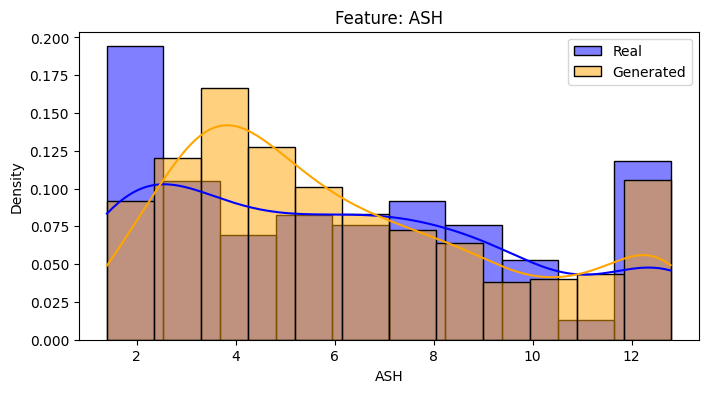

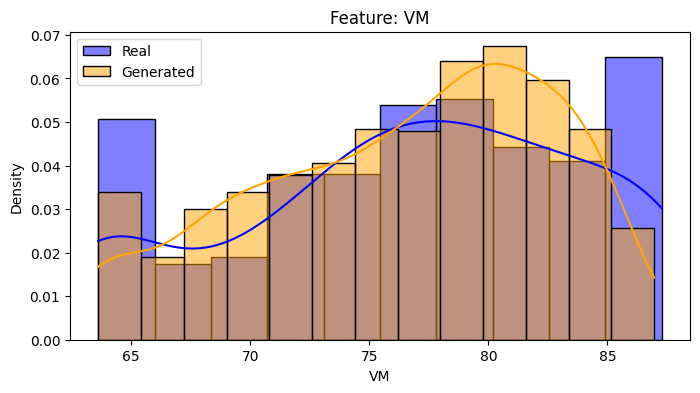

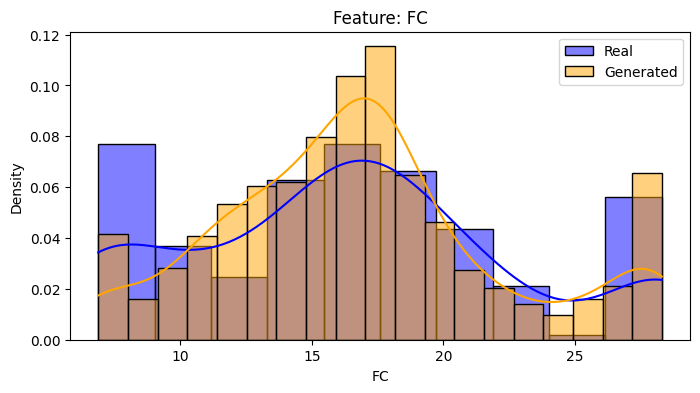

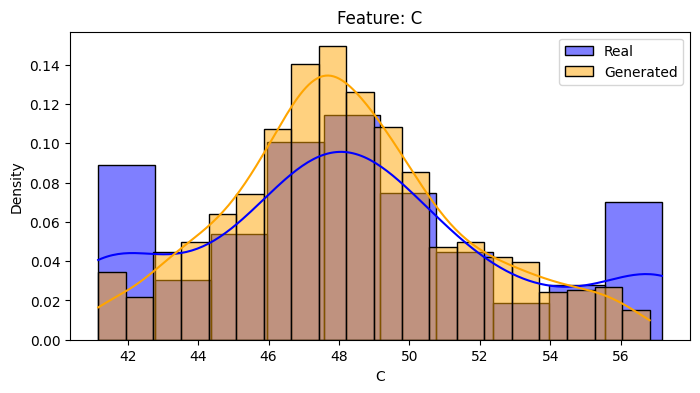

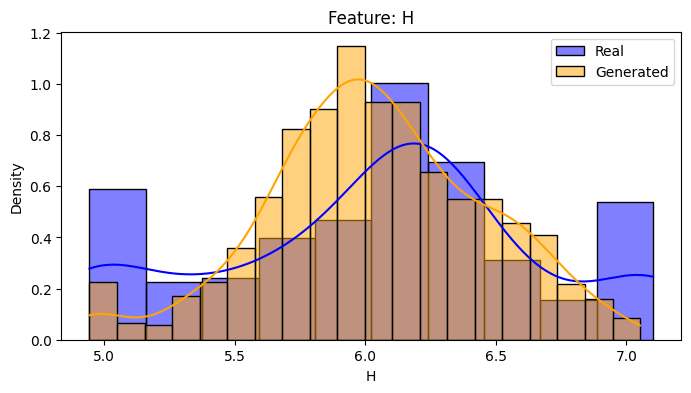

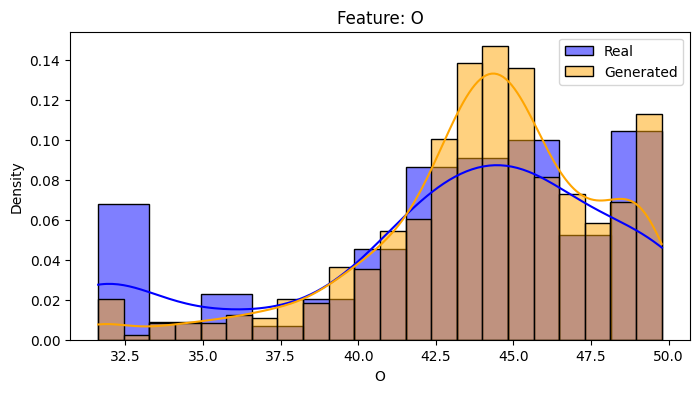

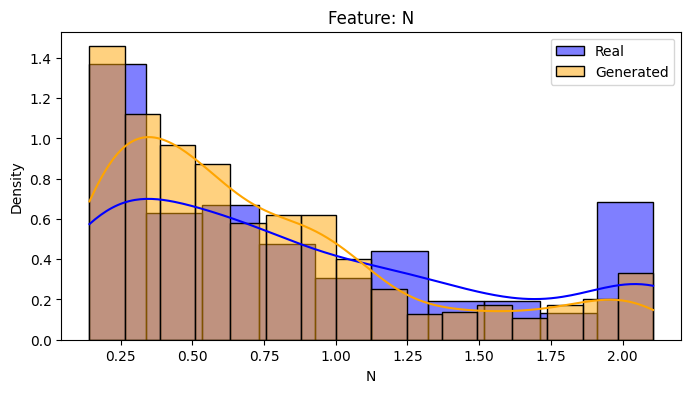

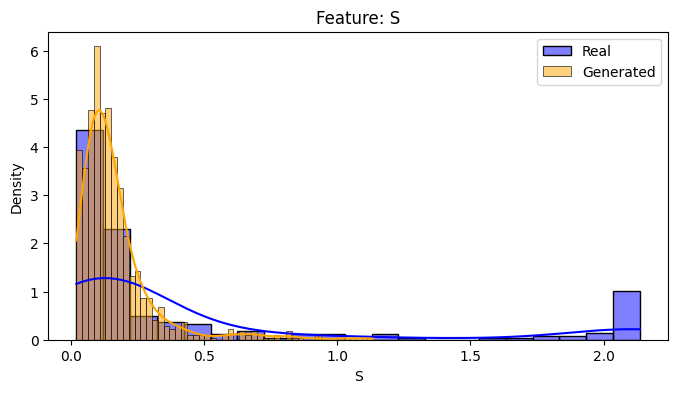

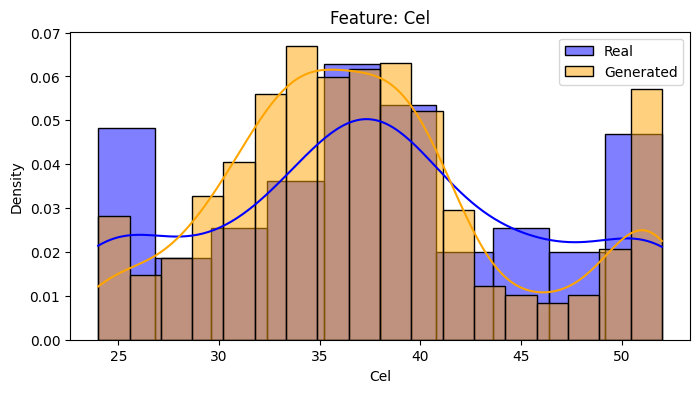

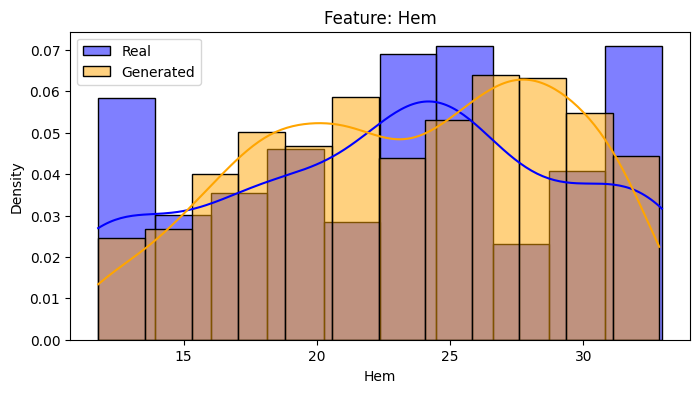

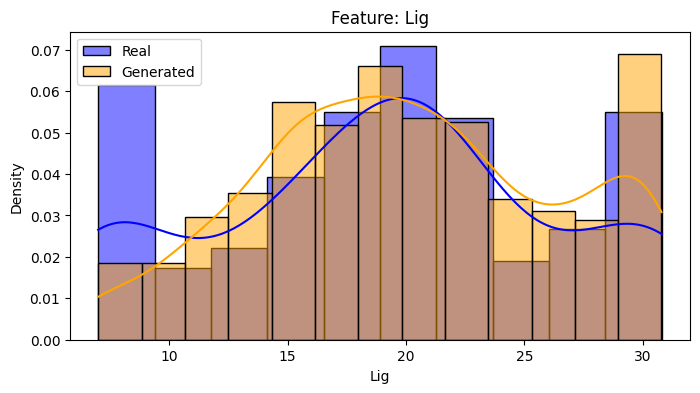

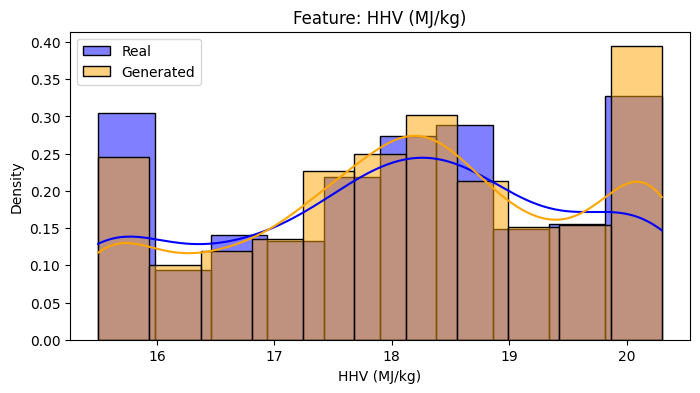

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


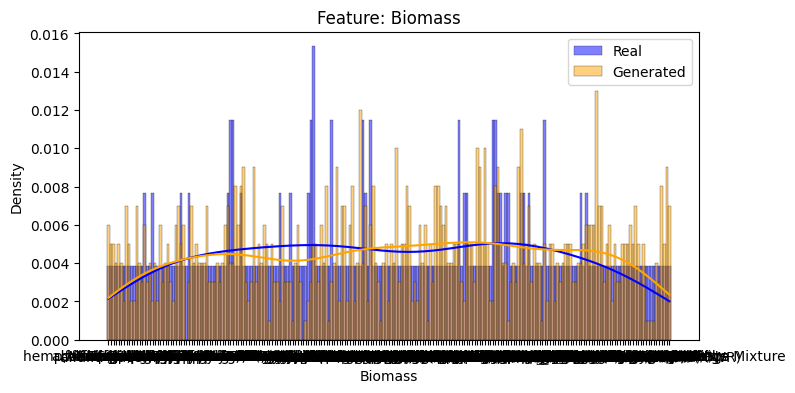

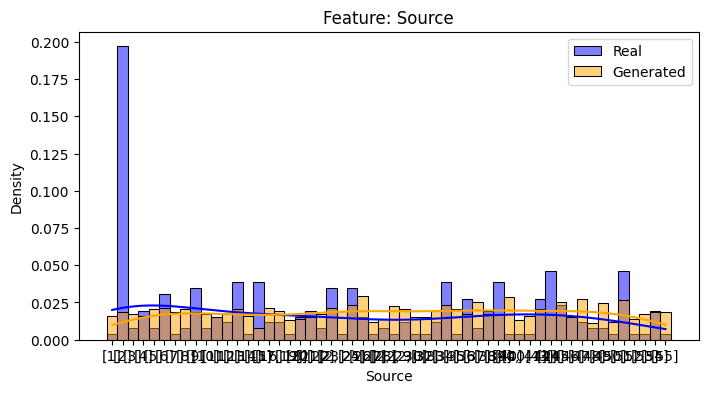

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in synthetic_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], color='blue', label='Real', kde=True, stat="density")
    sns.histplot(synthetic_df[column], color='orange', label='Generated', kde=True, stat="density")
    plt.title(f"Feature: {column}")
    plt.legend()
    plt.show()


In [47]:
#ploting box plots
import matplotlib.pyplot as plt
import seaborn as sns


**Regression Plots:**
Purpose: To visualize the relationship between two variables and identify potential predictors (features) for your target variable (HHV in this case). Reasoning: By observing the trend and scatter of points in the regression plot, you can get an idea of the strength and direction of the relationship between the two variables. A clear trend suggests a strong predictive relationship.

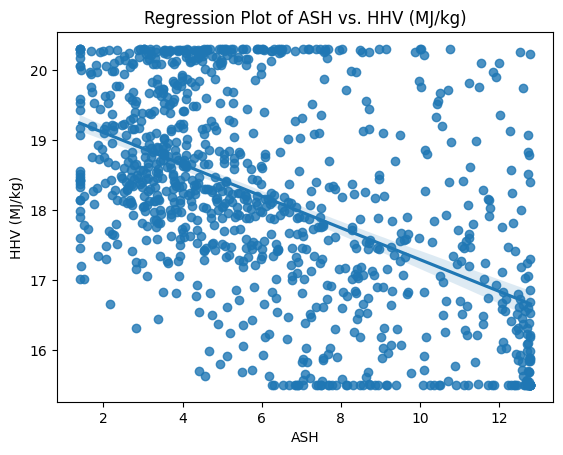

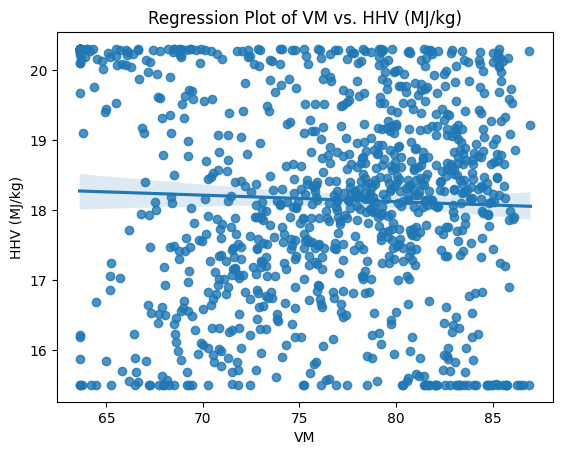

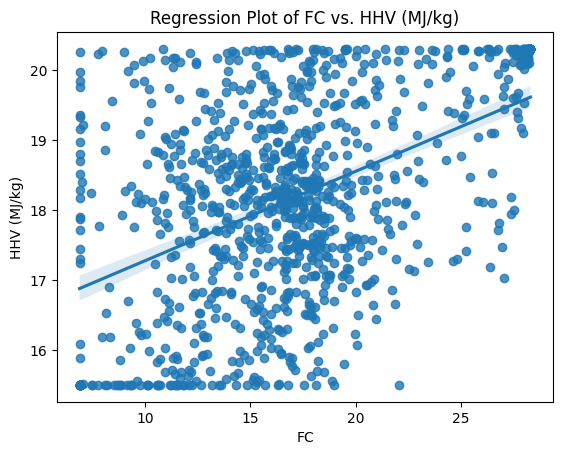

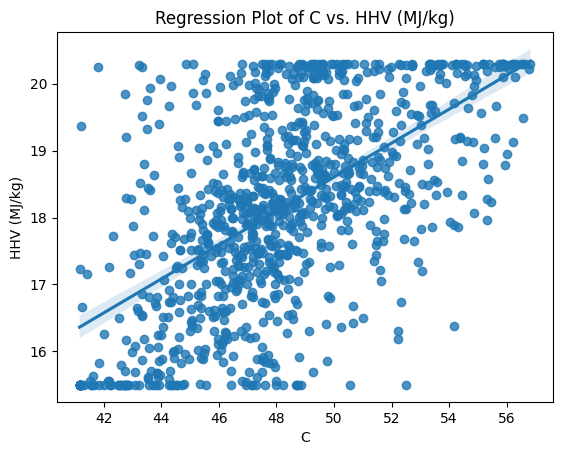

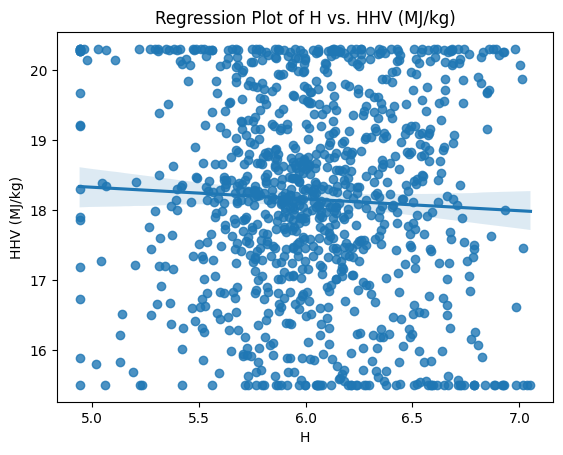

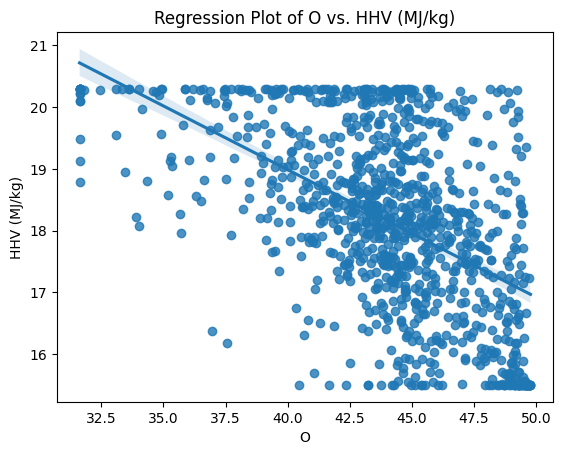

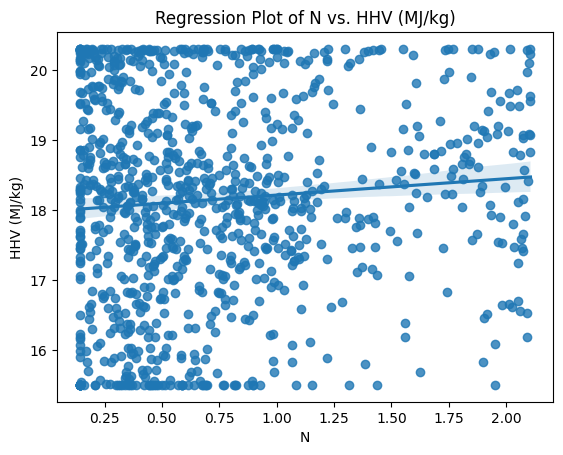

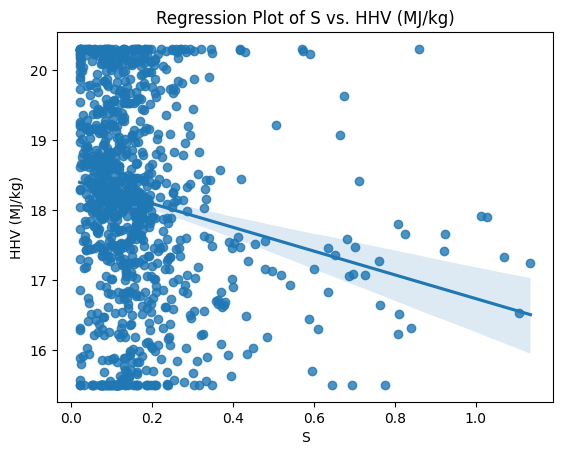

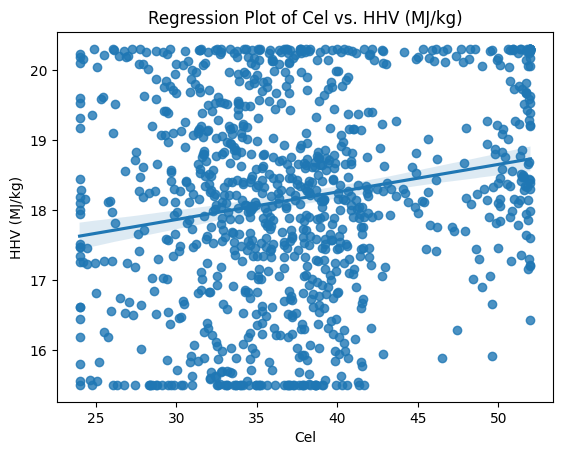

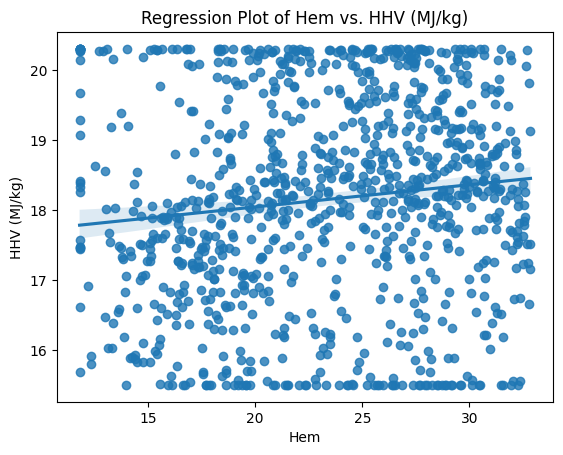

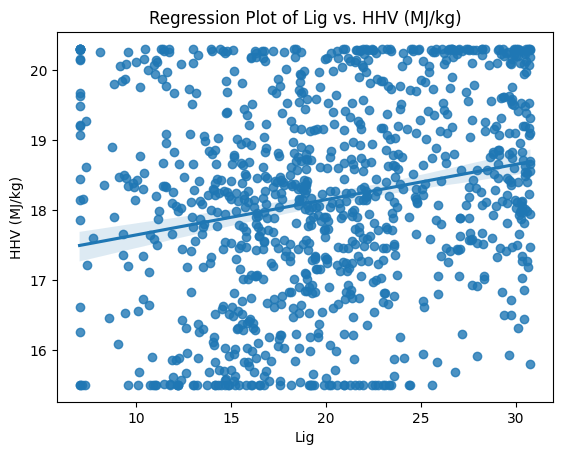

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot against 'HHV (MJ/kg)'
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']

# Loop through each column and create a regression plot
for column in columns_to_plot:
    sns.regplot(x=column, y='HHV (MJ/kg)', data=synthetic_df)
    plt.title(f'Regression Plot of {column} vs. HHV (MJ/kg)')  # Dynamic title
    plt.show()

              ASH    VM    FC     C     H     O     N     S   Cel   Hem   Lig  \
ASH          1.00 -0.46 -0.23 -0.28  0.21  0.13  0.22  0.31 -0.28 -0.11 -0.18   
VM          -0.46  1.00 -0.71 -0.28 -0.21  0.40 -0.28 -0.18  0.17  0.13 -0.06   
FC          -0.23 -0.71  1.00  0.48  0.08 -0.49  0.16 -0.03  0.02 -0.07  0.22   
C           -0.28 -0.28  0.48  1.00  0.01 -0.93  0.19 -0.13  0.30 -0.04  0.14   
H            0.21 -0.21  0.08  0.01  1.00 -0.17  0.10  0.16 -0.27  0.20  0.09   
O            0.13  0.40 -0.49 -0.93 -0.17  1.00 -0.41  0.01 -0.15  0.03 -0.15   
N            0.22 -0.28  0.16  0.19  0.10 -0.41  1.00  0.29 -0.26 -0.19 -0.01   
S            0.31 -0.18 -0.03 -0.13  0.16  0.01  0.29  1.00 -0.11 -0.29 -0.16   
Cel         -0.28  0.17  0.02  0.30 -0.27 -0.15 -0.26 -0.11  1.00 -0.13 -0.21   
Hem         -0.11  0.13 -0.07 -0.04  0.20  0.03 -0.19 -0.29 -0.13  1.00 -0.03   
Lig         -0.18 -0.06  0.22  0.14  0.09 -0.15 -0.01 -0.16 -0.21 -0.03  1.00   
HHV (MJ/kg) -0.52 -0.08  0.5

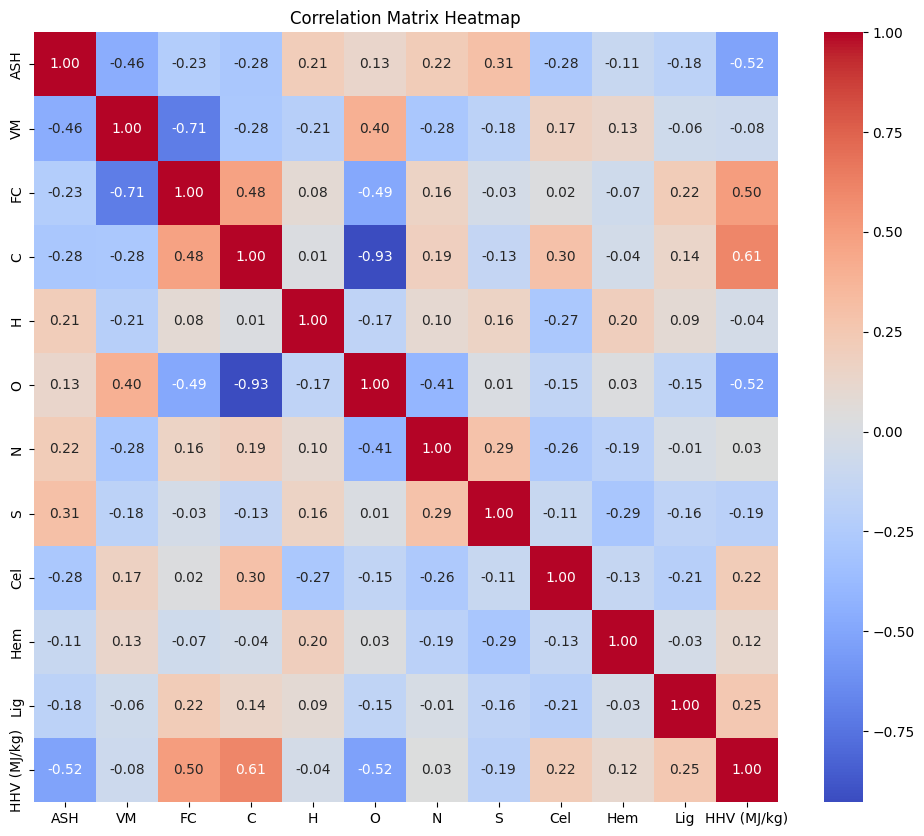

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# and you want to include all columns in the correlation matrix
# columns_for_correlation = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
columns_for_correlation = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Calculate the correlation matrix
correlation_matrix = synthetic_df[columns_for_correlation].corr()
print(correlation_matrix)  # Print the correlation matrix
# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


**Step 1: Model Training, Cross-Validation, and Evaluation**

In [39]:
!pip install tf-keras==2.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
      Successfully uninstalled tf_keras-2.17.0


In [40]:
#!pip install tensorflow
#pip install --upgrade tensorflow
!pip install tensorflow --upgrade


In [192]:
import xgboost as xgb
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import tensorflow as tf
from sklearn.model_selection import GridSearchCV


In [193]:
import sklearn
print(sklearn.__version__)


1.5.2


<ipython-input-52-19c9771bf074>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue


Selected Features: [ True False  True  True False False False False False False False]
Feature Ranking: [1 5 1 1 8 6 3 9 2 7 4]
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 324.3470
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 304.0073 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 270.7049 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206.3269  
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109.9514 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.6935 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6001 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1742
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8304
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0

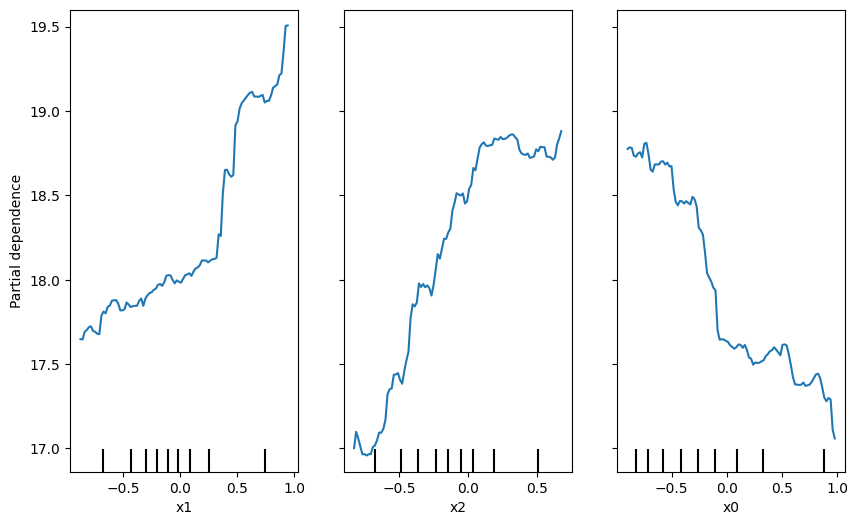

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
#X = synthetic_df[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
X=synthetic_df[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = synthetic_df['HHV (MJ/kg)']  # Target variable

# Handle missing values in X
X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set as NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with the column mean

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows where target variable y has NaN values

# Ensure X and y have matching number of rows after dropping missing target rows
X = X.iloc[y.index]

# Scaling the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)  # Scale features

# Feature Selection using RandomForestRegressor
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)  # Selecting top 3 features
X_selected = rf_selector.fit_transform(X_scaled, y)

print("Selected Features:", rf_selector.support_)
print("Feature Ranking:", rf_selector.ranking_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Model hyperparameters for RF, ET, XGBoost, and ANN
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# 1. Hyperparameter Tuning for RandomForestRegressor with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, cv=10, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# 2. Hyperparameter Tuning for XGBoost with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, cv=10, n_jobs=-1, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Hyperparameter Tuning for ExtraTreesRegressor with GridSearchCV
et_model = GridSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, cv=10, n_jobs=-1, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate models and report results
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))

# Plot partial dependence
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


<ipython-input-42-e8fd41bf17ba>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue


Selected Features: [ True False False  True False  True False False False False False]
Feature Ranking: [1 5 2 1 4 1 3 8 9 6 7]
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 343.5558
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 325.7763 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 327.4523 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 327.5919 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 315.7142 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304.3593 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310.6742 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305.5703 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 295.0365 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 283.8963 
Epoch 11/

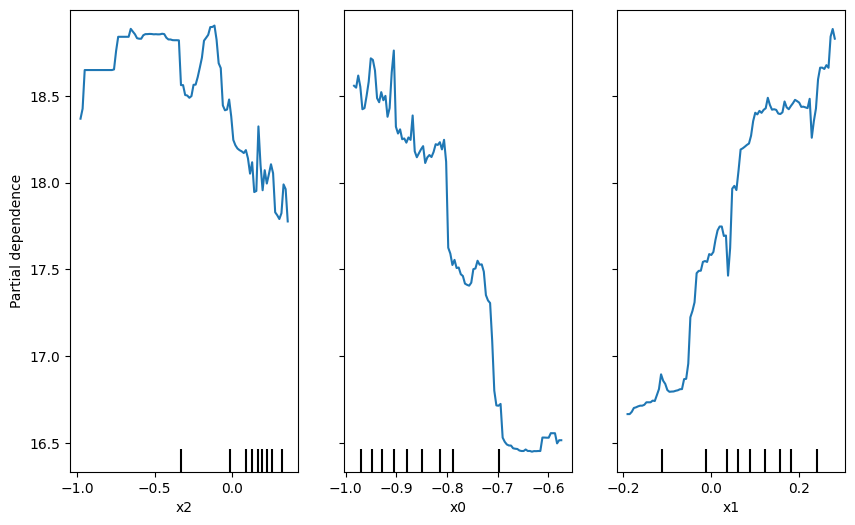

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values in X
X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set as NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with the column mean

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows where target variable y has NaN values

# Ensure X and y have matching number of rows after dropping missing target rows
X = X.iloc[y.index]

# Scaling the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)  # Scale features

# Feature Selection using RandomForestRegressor
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)  # Selecting top 3 features
X_selected = rf_selector.fit_transform(X_scaled, y)

print("Selected Features:", rf_selector.support_)
print("Feature Ranking:", rf_selector.ranking_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Model hyperparameters for RF, ET, XGBoost, and ANN
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# 1. Hyperparameter Tuning for RandomForestRegressor with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, cv=10, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# 2. Hyperparameter Tuning for XGBoost with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, cv=10, n_jobs=-1, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Hyperparameter Tuning for ExtraTreesRegressor with GridSearchCV
et_model = GridSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, cv=10, n_jobs=-1, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate models and report results
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))

# Plot partial dependence
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


In [ ]:
#install polynomial features
!pip install -U scikit-learn

<ipython-input-51-e8fd41bf17ba>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue


Selected Features: [ True False False  True False  True False False False False False]
Feature Ranking: [1 5 2 1 4 1 3 8 9 6 7]
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 330.9431
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 328.2911  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 321.0217  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 309.6455 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 307.3333 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 300.3532  
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 299.2382 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 286.1252 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 269.5600  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 250.3067  
Epoc

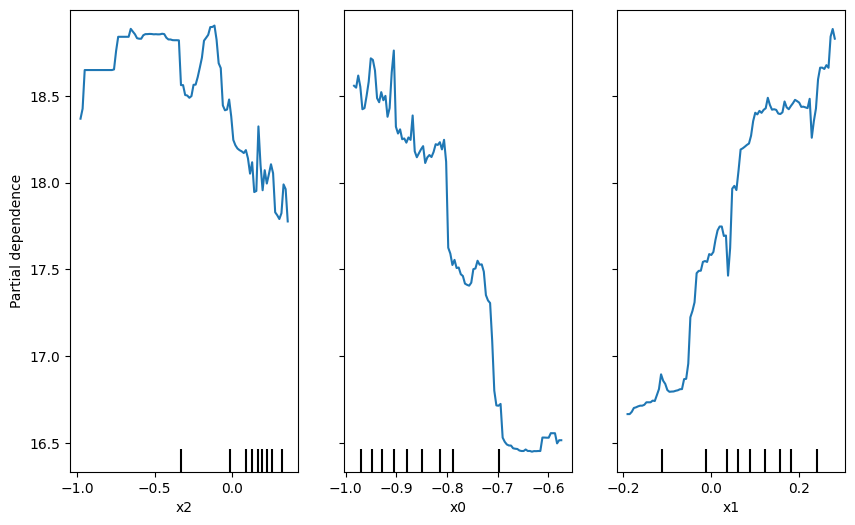

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values in X
X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set as NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with the column mean

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows where target variable y has NaN values

# Ensure X and y have matching number of rows after dropping missing target rows
X = X.iloc[y.index]

# Scaling the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)  # Scale features

# Feature Selection using RandomForestRegressor
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)  # Selecting top 3 features
X_selected = rf_selector.fit_transform(X_scaled, y)

print("Selected Features:", rf_selector.support_)
print("Feature Ranking:", rf_selector.ranking_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Model hyperparameters for RF, ET, XGBoost, and ANN
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# 1. Hyperparameter Tuning for RandomForestRegressor with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, cv=10, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# 2. Hyperparameter Tuning for XGBoost with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, cv=10, n_jobs=-1, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Hyperparameter Tuning for ExtraTreesRegressor with GridSearchCV
et_model = GridSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, cv=10, n_jobs=-1, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate models and report results
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))

# Plot partial dependence
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


<ipython-input-111-7a43358d2e95>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 317.4874 - val_loss: 319.7023 - learning_rate: 0.0010
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 314.5762 - val_loss: 316.6870 - learning_rate: 0.0010
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 311.4715 - val_loss: 313.4638 - learning_rate: 0.0010
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 308.0745 - val_loss: 309.9096 - learning_rate: 0.0010
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 304.3196 - val_loss: 305.8660 - learning_rate: 0.0010
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 300.1100 - val_loss: 301.3200 - learning_rate: 0.0010
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 295.4134 - val_loss: 296.2756 - learning_rate: 0.0010
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 290.1893 - val_loss: 290.5956 - learnin

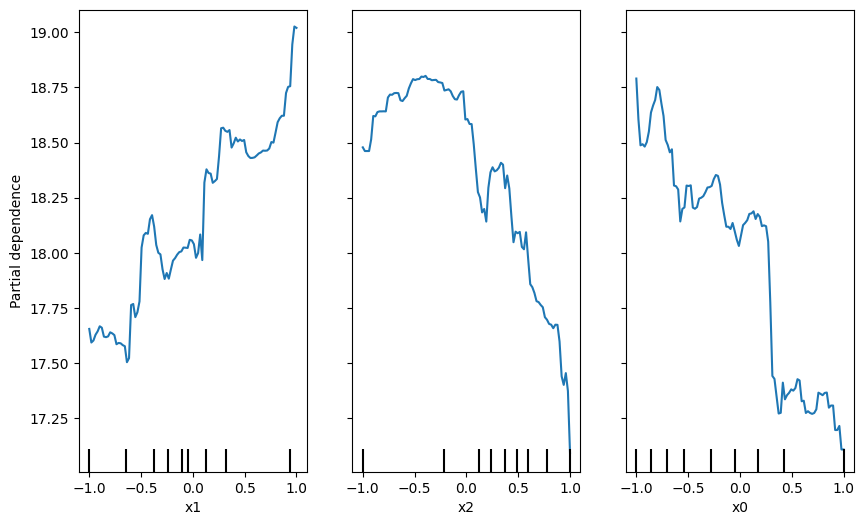

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import tensorflow as tf
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)  # Ensure TensorFlow's randomness is also controlled

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values
X.replace('-', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)
y = y.dropna()
X = X.iloc[y.index]

# Scale features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Feature Selection
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)
X_selected = rf_selector.fit_transform(X_scaled, y)

# Split data with a fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Hyperparameter grids
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5]
}

# 1. Random Forest with RandomizedSearchCV
rf_model = RandomizedSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, n_iter=30, cv=10, n_jobs=-1, random_state=seed, verbose=1)
rf_model.fit(X_train, y_train)

# 2. XGBoost with RandomizedSearchCV
xgb_model = RandomizedSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, n_iter=30, cv=10, n_jobs=-1, random_state=seed, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Extra Trees with RandomizedSearchCV
et_model = RandomizedSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, n_iter=30, cv=10, n_jobs=-1, random_state=seed, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
""""def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))  # First hidden layer
    model.add(Dense(20, activation=activation))  # Second hidden layer
    model.add(Dense(20, activation=activation))  # Third hidden layer
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model
"""
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(10, activation=activation))
    model.add(Dense(10, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')

# Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the ANN model with callbacks
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluate models
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    if model_name == 'ANN':
        y_pred = model.predict(X_test).flatten()  # Flatten output for ANN
    else:
        y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features in Random Forest
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()
